# Titanic Survived Classification 

Titanic Data Description : 

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers, Skewness and Predicting the People Survived the Titanic Crash

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import power_transform, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

As we have completed importing of Essesential Libraries not we will import the data and look at the data closely

In [221]:
#here we are importing the data using pandas.read_csv()method and saving it in ds varible
ds = pd.read_csv('~/Desktop/Datatrained/Titanic/titanic.csv')

Now we will see the first 5 rows of the dataset using ds.head()

In [222]:
ds.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

from here we can see the dataset is a mixture of object, float64, int64 datatypes lets see the count of datatype using ds.info() it will give all the infromation about the data

In [223]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above we can see that there are two float64, 5 int64 variables and 5 object type of varible in dataset

the column size is 12 and row size is 891

From above column we can identify that Age, Cabin and Embarked has missing values we will fix it later stage now lets see the shape of the dataset using ds.shape

In [224]:
r, c = ds.shape
print("There are {} Number of rows and {} number of columns".format(r, c))

There are 891 Number of rows and 12 number of columns


from here we can see that there are 891 rows and 12 columns

now lets see which column has how many missing values using ds.isnull().sum()

In [225]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From above we can see that there are 177 Missing values in Age, 687 in Cabin and 2 in Embarked we will fix it using mean, median or mode method

Now let us see how statistical description of data looks like

We can view Statistical Information using ds.describe()

In [226]:
ds.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

From above we can see all the stastics of data now lets visualize this

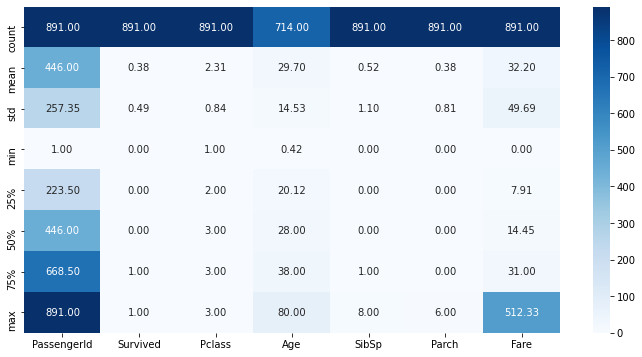

In [227]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.describe(), cmap='Blues', annot = True, fmt='.2f')

from above we can identify that darker the area maximum the value it has

lets see the visualization of null values in the dataset

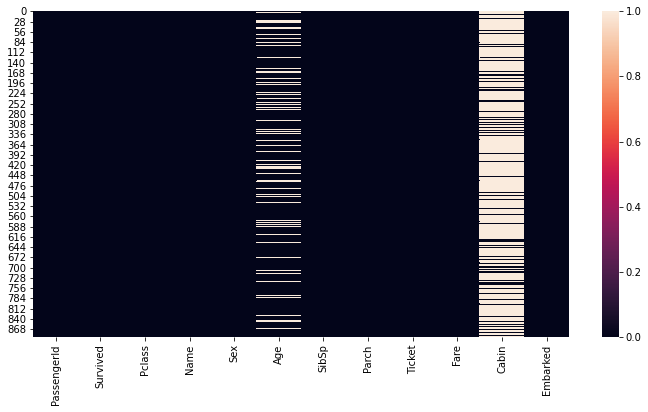

In [228]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull())

From here we can see that the white spots shows us the missing values in the dataset

In [229]:
ds.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Lets Start with data preprocessing 

lets fix the null values in the dataset

In [230]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
ds['Age'].fillna(ds['Age'].median(), inplace = True)

In [232]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

from above we can say that we have filled all the null values with Median of age columns

now let us fix the cabin column as it has maximum number of null variables

lets add a new variable in Cabin because 687 people can't be in the same cabin so we will add missing in the place of nan values

In [233]:
ds['Cabin'].fillna('Missing', inplace = True)

In [234]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Now let us fix Embarked column by using mode of the column

In [235]:
ds['Embarked'].mode()

0    S
dtype: object

So from above we came to know that the column has more number of S so we will add S in those 2 missing varibles

In [236]:
ds['Embarked'].fillna('S', inplace = True)

In [237]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

from above tab we can see that the dataset has now zero missing values

In [238]:
ds.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  Missing        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  Missing        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  Missing        S

lets change male to 1 and female to 0

In [239]:
ds['Sex'].replace(['female','male'],[0,1],inplace=True)
ds.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare    Cabin Embarked  
0         A/5 21171   7.2500  Missing        S  
1          PC 17599  71.2833      C85        C  
2  STON/O2. 3101282   7.9250  Missing        S  
3            113803  53.1000     C123        S  
4            373450   8.0500  Missing        S

### Lets Start EDA process now as we have all the data and no data is missing from the dataset 

In [240]:
ds.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare    Cabin Embarked  
0         A/5 21171   7.2500  Missing        S  
1          PC 17599  71.2833      C85        C  
2  STON/O2. 3101282   7.9250  Missing        S  
3            113803  53.1000     C123        S  
4            373450   8.0500  Missing        S

Count Plots of Columns
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Missing        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
B71              1
D6               1
F E69            1
D15              1
C90              1
Name: Cabin, Length: 148, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


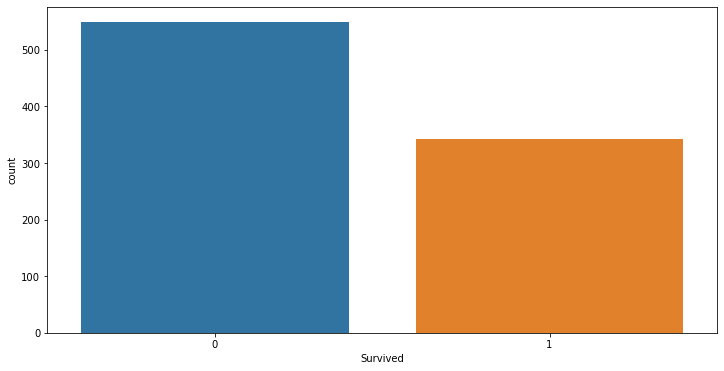

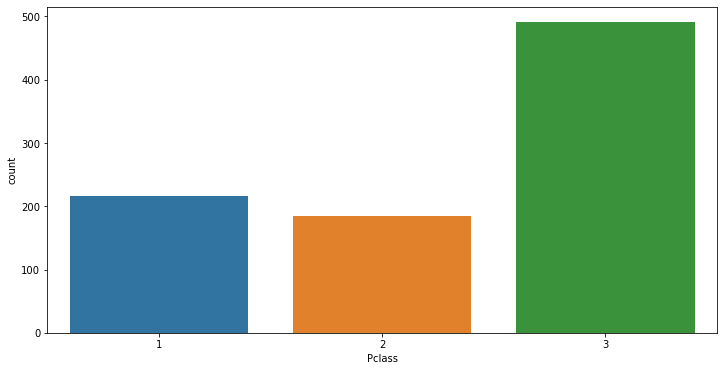

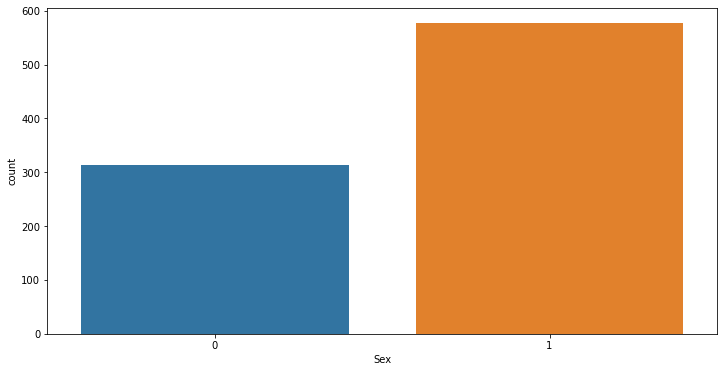

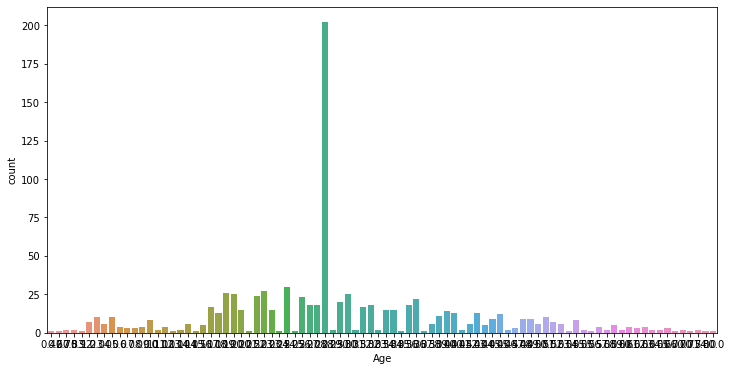

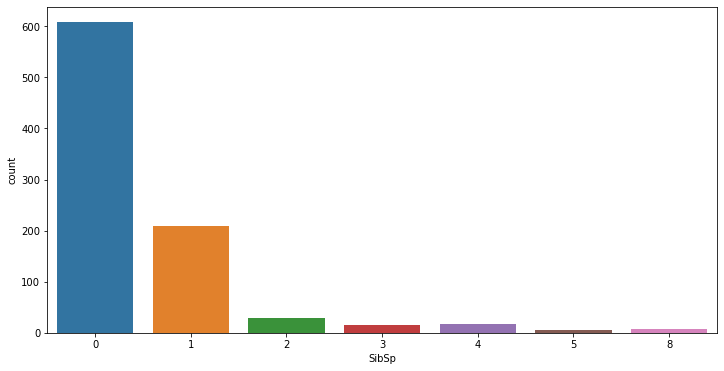

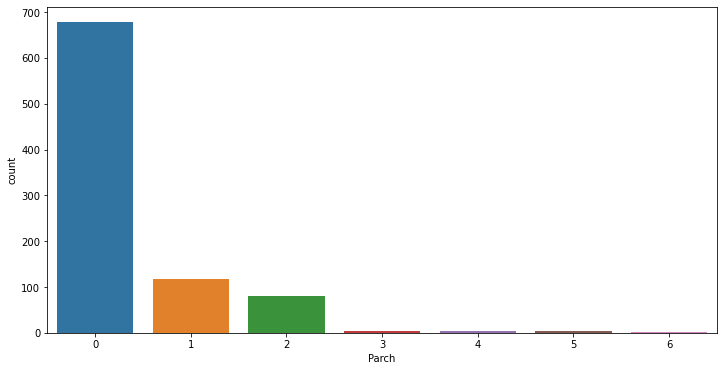

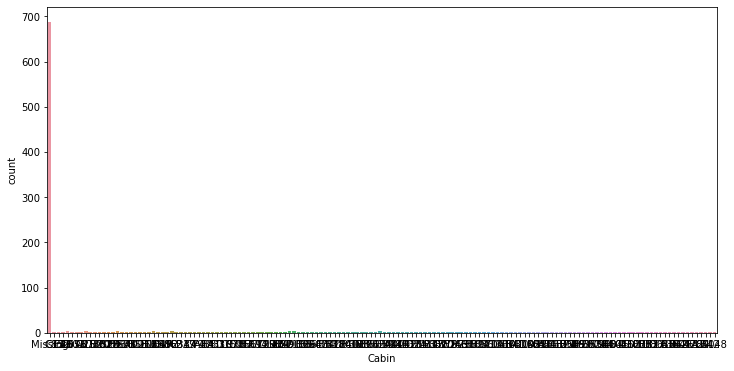

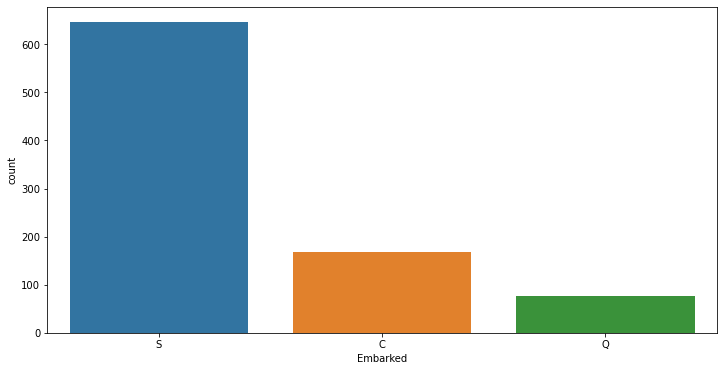

In [241]:
print("Count Plots of Columns")
column = ['Survived','Pclass','Sex','Age','SibSp','Parch',"Cabin",'Embarked']
for c in column:
    plt.figure(figsize = (12,6))
    sns.countplot(ds[c])
    print(ds[c].value_counts())

from above we can see that there are 549 passenger who didn't survived

there where more number of person those where travelling in class 3

There were 577 males and 314 Females on the ship

There were more people who were not having there siblings with them

Most Number of Passenger where from Southamton

In [242]:
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [243]:
column = ['Fare','Age', 'PassengerId']

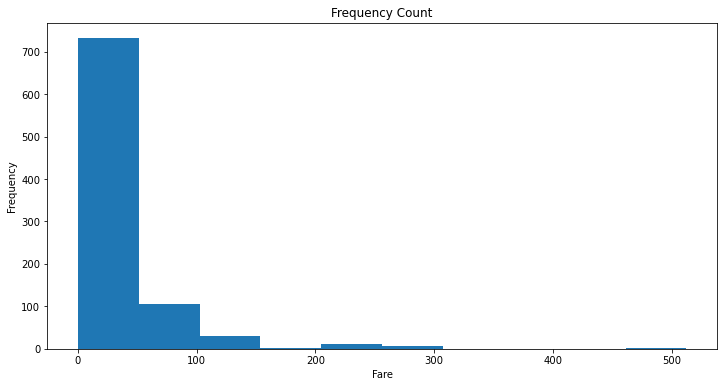

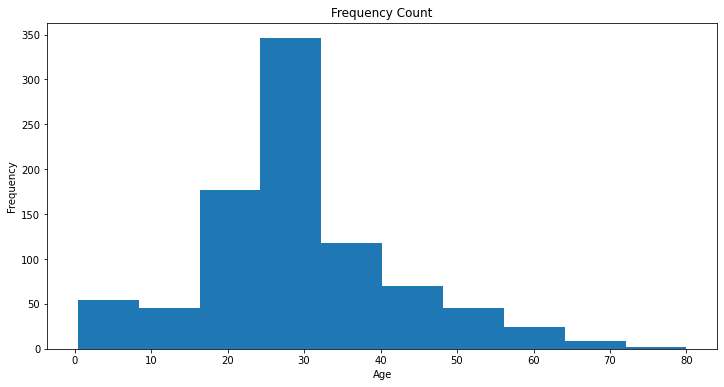

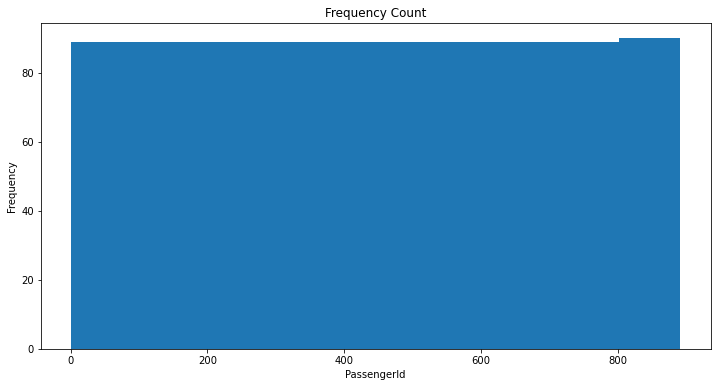

In [244]:
for c in column:
    plt.figure(figsize = (12,6))
    plt.title('Frequency Count')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.hist(ds[c])

In [245]:
ds[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

From above we can tell that passengers of Class 1 survived 62% followed by class 2 at 47% and at last class 3 with 24%

If you pay more money you will have greater chance of Surviving

In [246]:
ds[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

Sex  Survived
0    0  0.742038
1    1  0.188908

From above we came to know that Female has a survival probablity of 74% while male only has 18%

In [247]:
ds[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

So 1 Sibling has 53% Survival followed by 2 has 46% 3 has 34% 4 has 16% while 5 and 6 have 0%

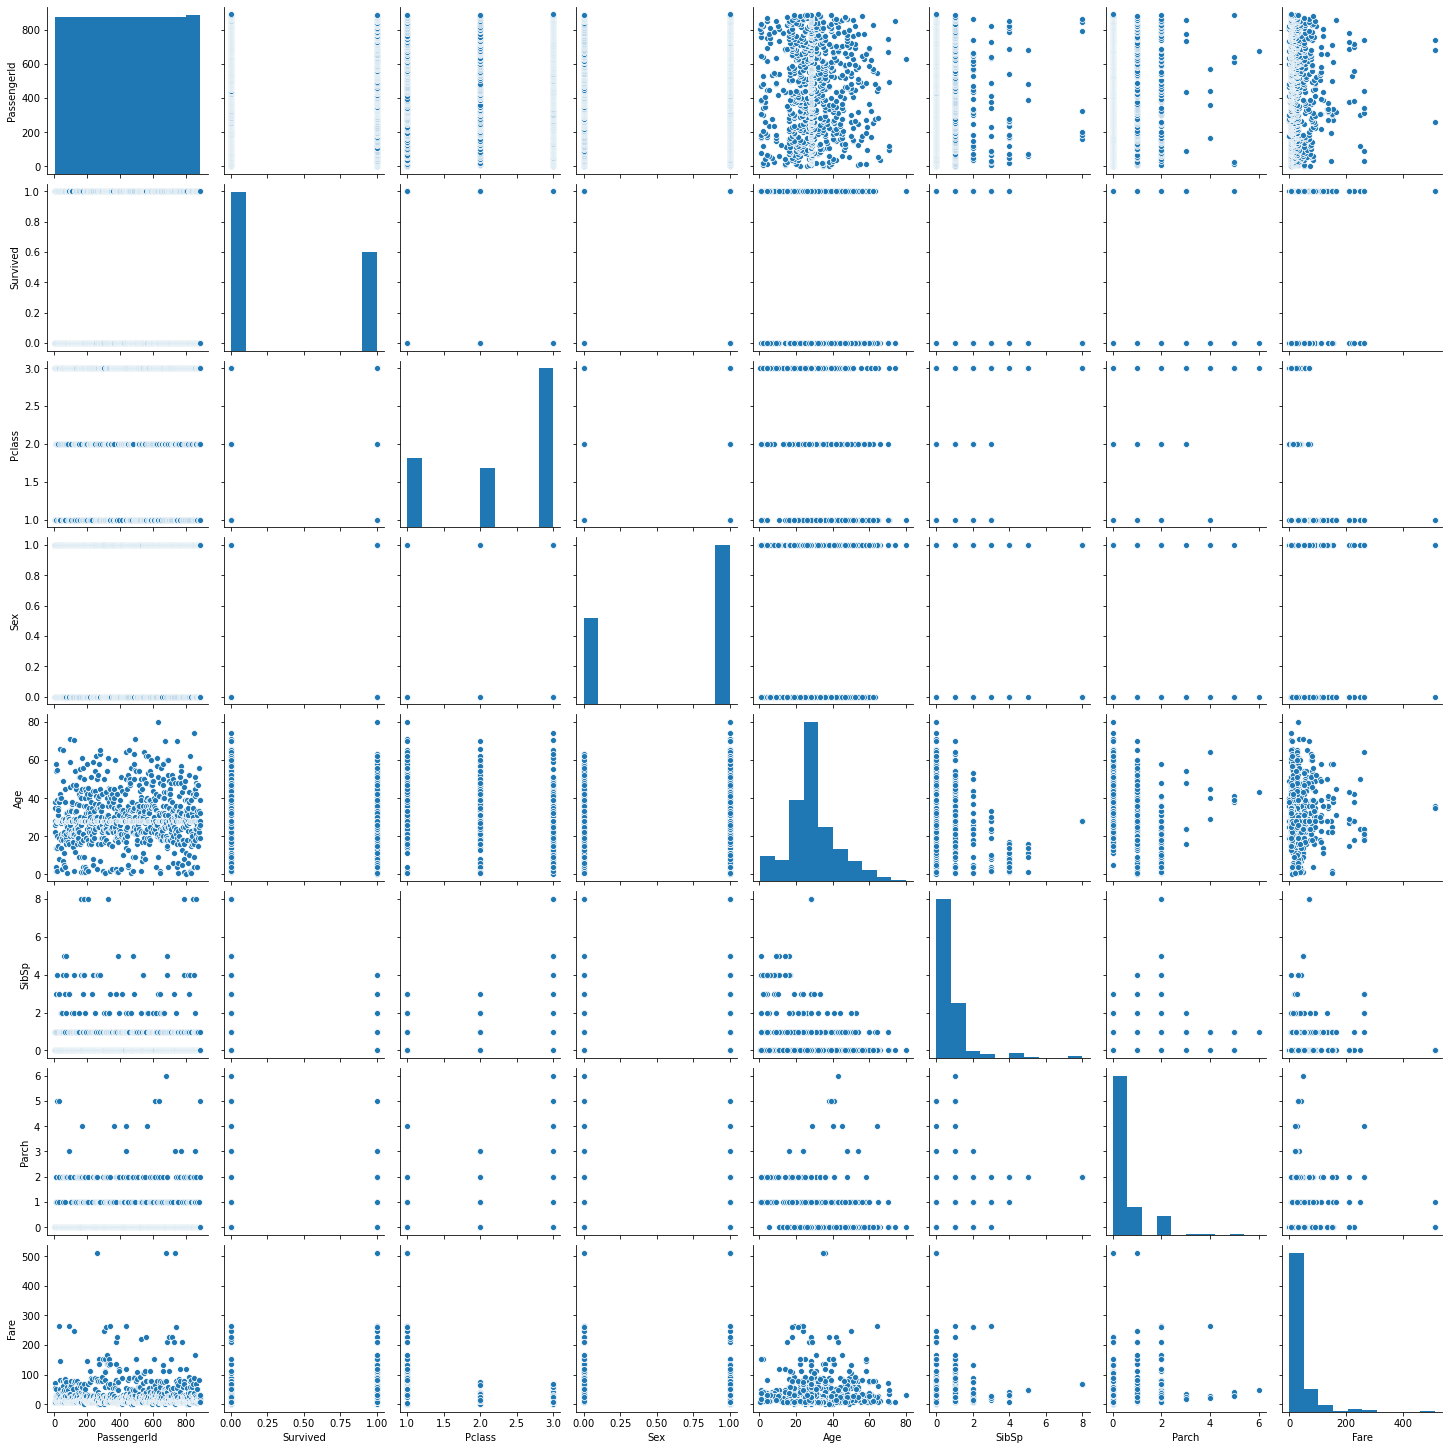

In [248]:
sns.pairplot(ds)

lets see if there is outlier in the dataset ot not

In [249]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [250]:
columns = ['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']

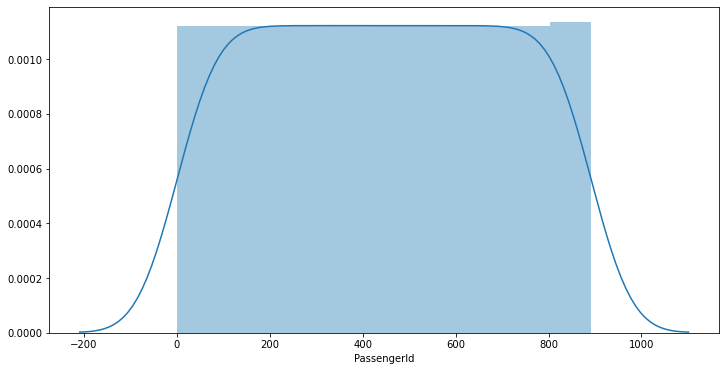

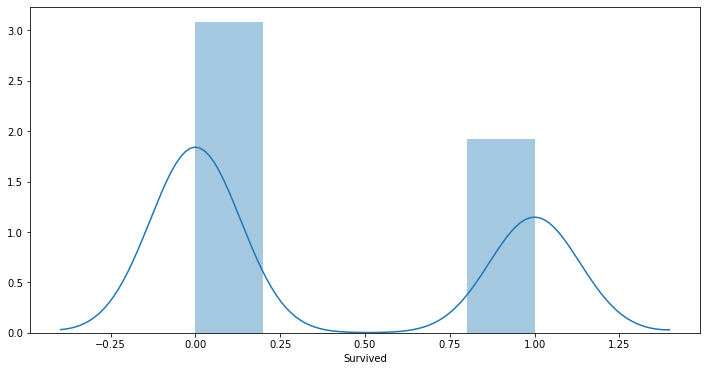

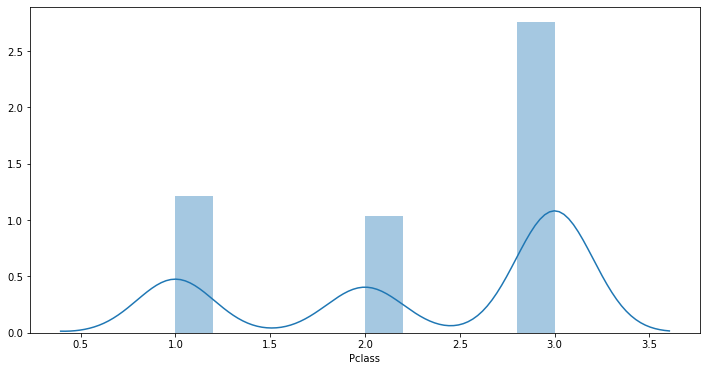

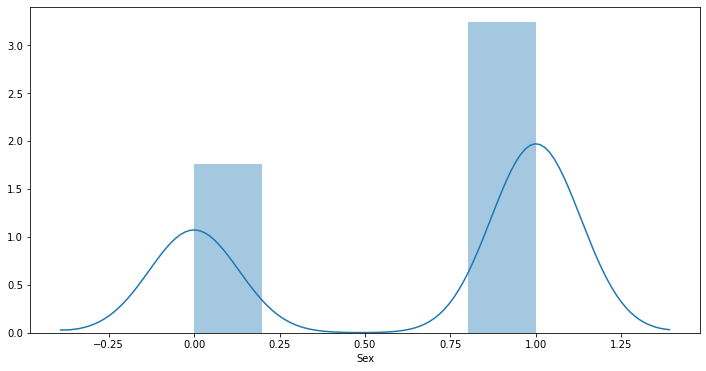

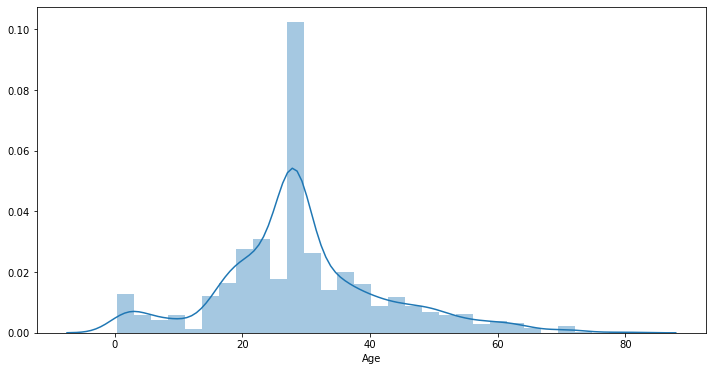

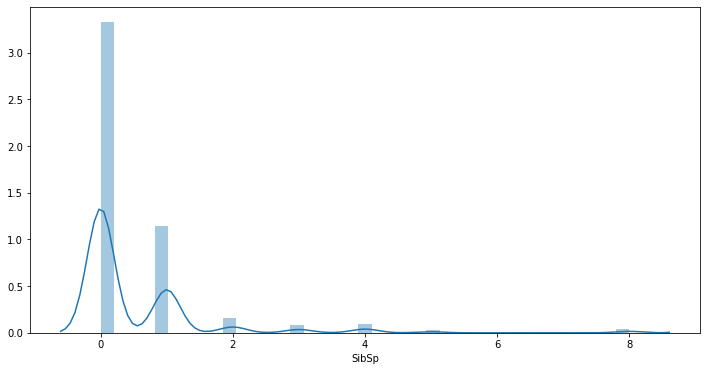

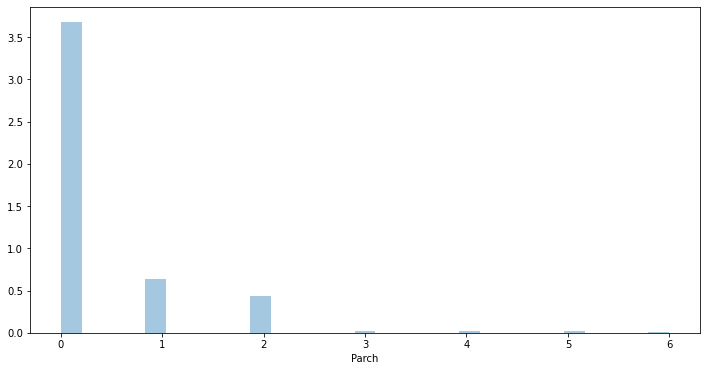

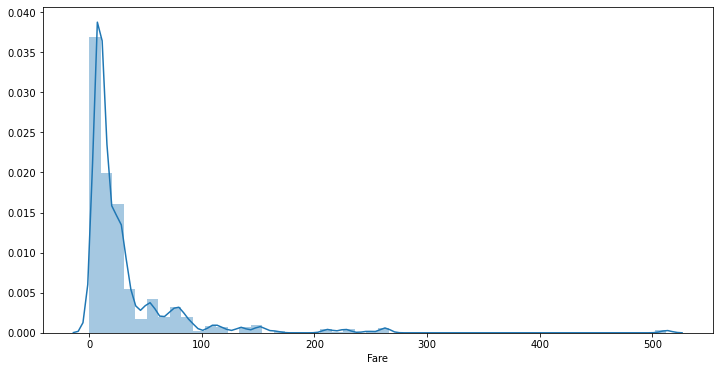

In [251]:
for c in columns:
    plt.figure(figsize = (12,6))
    sns.distplot(ds[c])

We can see that some of the data has skewness now lets check the skewness of data using ds.skew()

lets see the outliers in the dataset

In [252]:
ds.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare    Cabin Embarked  
0         A/5 21171   7.2500  Missing        S  
1          PC 17599  71.2833      C85        C  
2  STON/O2. 3101282   7.9250  Missing        S  
3            113803  53.1000     C123        S  
4            373450   8.0500  Missing        S

Lets find out the outlers in the dataset using boxplot

lets label encode the dataset and drop name and ticket column as it will not help us much

In [253]:
ds.drop(['Name', 'Ticket'], axis = 1, inplace=True)

In [254]:
ds.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare    Cabin  \
0            1         0       3    1  22.0      1      0   7.2500  Missing   
1            2         1       1    0  38.0      1      0  71.2833      C85   
2            3         1       3    0  26.0      0      0   7.9250  Missing   
3            4         1       1    0  35.0      1      0  53.1000     C123   
4            5         0       3    1  35.0      0      0   8.0500  Missing   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

We have removed Name and Ticket from the dataset as it was not Important data to be consider not lets use label encoder

In [255]:
le = LabelEncoder()

In [256]:
dsnew = ds.apply(le.fit_transform)
dsnew.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  \
0            0         0       2    1   28      1      0    18    146   
1            1         1       0    0   51      1      0   207     81   
2            2         1       2    0   34      0      0    41    146   
3            3         1       0    0   47      1      0   189     55   
4            4         0       2    1   47      0      0    43    146   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2

From above we can see that we have successfully converted all the data into numeric format now it will be easy to find the outliers and make model and predictions as model only accept numeric values

lets findout boxplot for all the columns

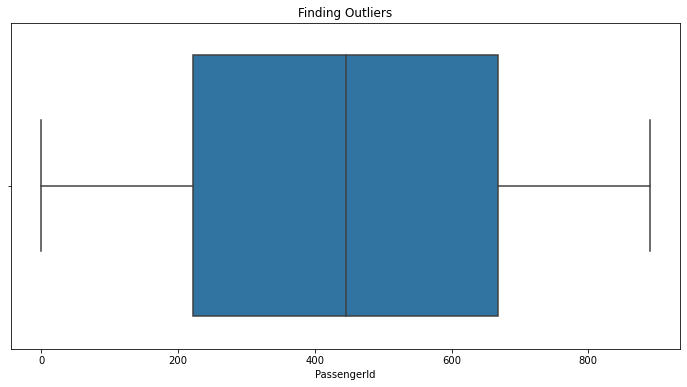

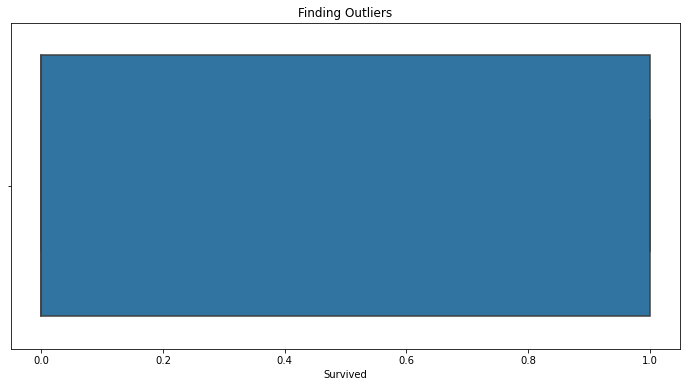

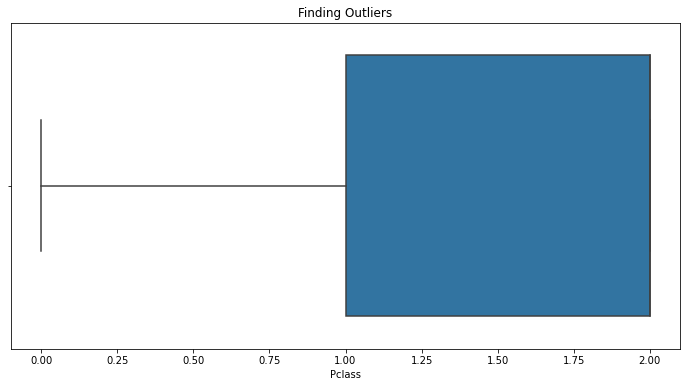

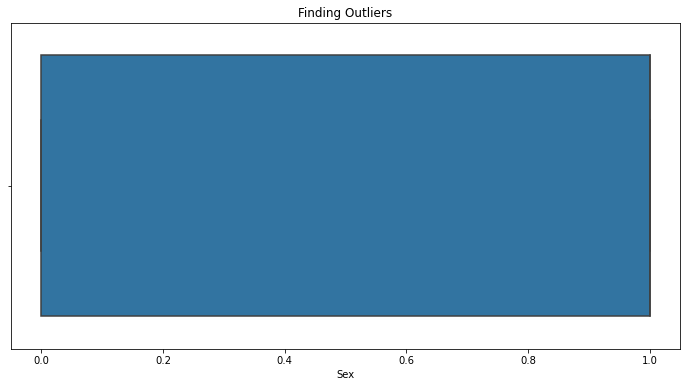

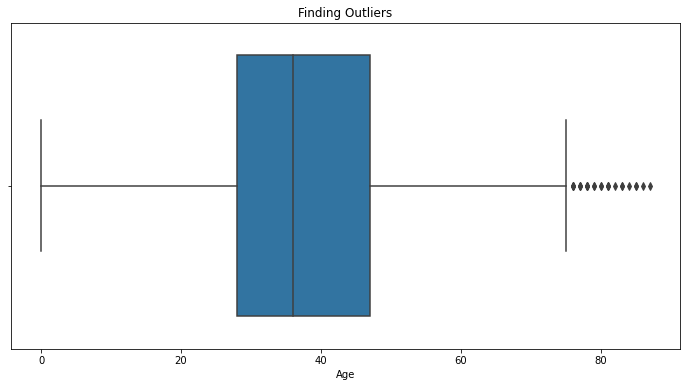

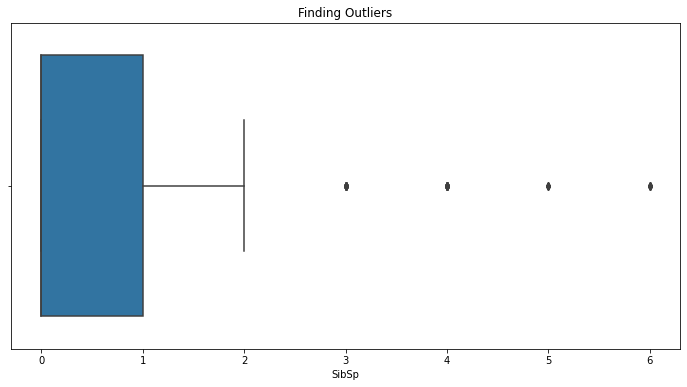

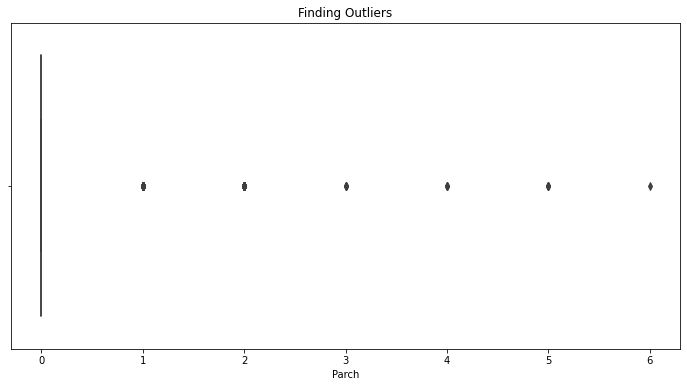

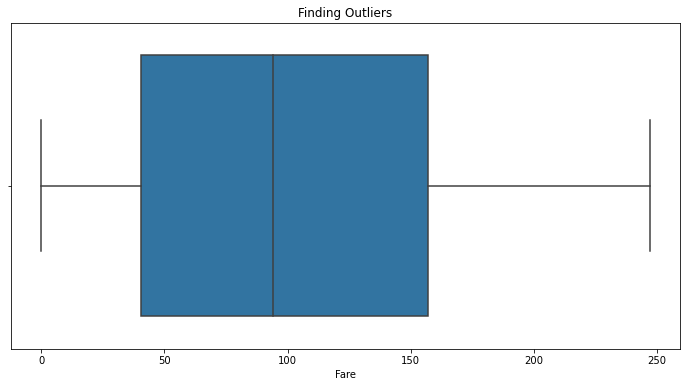

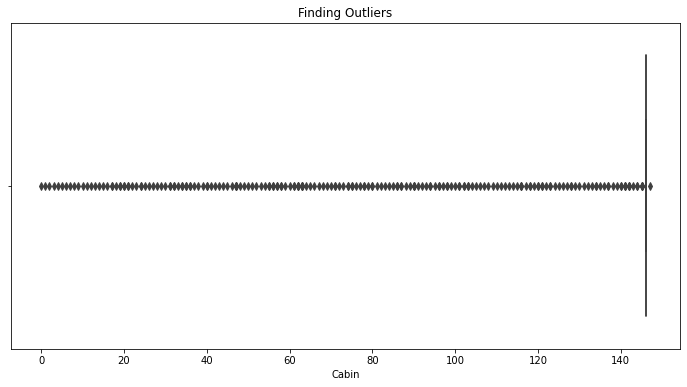

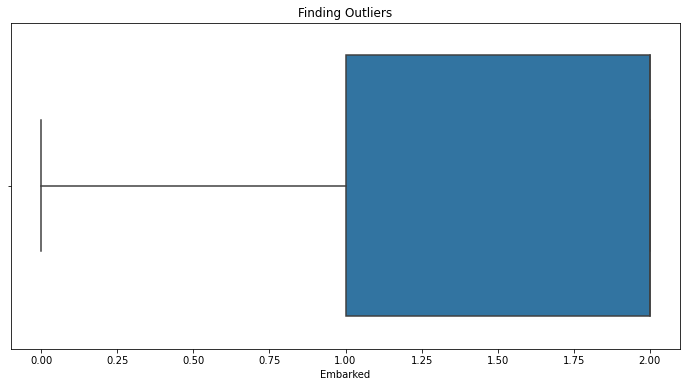

In [257]:
for col in dsnew.columns:
    plt.figure(figsize = (12,6))
    plt.title("Finding Outliers")
    sns.boxplot(dsnew[col])

SO we can see outlier in Cabin, Parch, SibSp, Age lets fix it with zscore

In [258]:
zscr = np.abs(zscore(dsnew))
threshold = 3
print(np.where(zscr>3))

(array([ 13,  16,  23,  25,  50,  54,  59,  61,  68,  71,  86,  96, 119,
       159, 164, 167, 170, 171, 174, 180, 182, 185, 201, 209, 233, 261,
       266, 278, 284, 324, 329, 360, 386, 437, 438, 445, 475, 480, 523,
       540, 541, 542, 556, 567, 583, 599, 610, 630, 638, 647, 678, 683,
       686, 690, 736, 737, 745, 774, 779, 781, 787, 792, 806, 813, 815,
       824, 829, 846, 850, 858, 863, 867, 885]), array([6, 5, 8, 6, 5, 8, 5, 8, 5, 5, 6, 8, 5, 5, 5, 6, 8, 5, 8, 5, 5, 8,
       5, 8, 5, 5, 5, 5, 8, 5, 8, 6, 5, 6, 6, 8, 8, 5, 8, 8, 5, 5, 8, 6,
       8, 8, 6, 8, 6, 8, 6, 5, 5, 8, 6, 8, 8, 6, 8, 8, 5, 5, 8, 5, 8, 5,
       8, 5, 5, 6, 5, 8, 6]))


In [259]:
print("Shape before removing the outlier", ds.shape)

ds_new = dsnew[(zscr<3).all(axis=1)]

print("Shape after removing the outlier", ds_new.shape)

Shape before removing the outlier (891, 10)
Shape after removing the outlier (818, 10)


we have remove the outliers and saved in out new variable ds_new lets check how much data loss we will get if we proceed with the data without outliers

In [260]:
100-818/891*100

8.193041526374856

So we are loosing about 8% of our whole data.

In [262]:
ds_new.skew()

PassengerId    0.001733
Survived       0.451985
Pclass        -0.652416
Sex           -0.637475
Age            0.480870
SibSp          1.999520
Parch          2.057645
Fare           0.537652
Cabin         -2.292807
Embarked      -1.245380
dtype: float64

In [264]:
ds_new.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  \
0            0         0       2    1   28      1      0    18    146   
1            1         1       0    0   51      1      0   207     81   
2            2         1       2    0   34      0      0    41    146   
3            3         1       0    0   47      1      0   189     55   
4            4         0       2    1   47      0      0    43    146   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2

As the skewed columns were categorical columns we will not perform power transformation to it to normalize the data

so now lets divide out datset into Dependent and Independent varible so that we can do further model building process

In [267]:
X = ds_new.drop('Survived', axis = 1)
Y = ds_new['Survived']

In [268]:
print(X.shape)
print(Y.shape)

(818, 9)
(818,)


lets now scale the values in our independent variable

In [270]:
Sc = StandardScaler()

In [271]:
X_new = Sc.fit_transform(X)

In [272]:
X_new = pd.DataFrame(X_new, columns = X.columns)

In [273]:
X_new

PassengerId    Pclass       Sex       Age     SibSp     Parch      Fare  \
0      -1.747578  0.827363  0.731238 -0.661294  0.991436 -0.460556 -1.180116   
1      -1.743648 -1.607107 -1.367544  0.815452  0.991436 -0.460556  1.551351   
2      -1.739717  0.827363 -1.367544 -0.276056 -0.562193 -0.460556 -0.847715   
3      -1.735787 -1.607107 -1.367544  0.558626  0.991436 -0.460556  1.291211   
4      -1.731856  0.827363  0.731238  0.558626 -0.562193 -0.460556 -0.818811   
..           ...       ...       ...       ...       ...       ...       ...   
813     1.734874 -0.389872  0.731238 -0.211849 -0.562193 -0.460556 -0.211818   
814     1.738804 -1.607107 -1.367544 -0.918119 -0.562193 -0.460556  0.770931   
815     1.742735  0.827363 -1.367544 -0.147643  0.991436  2.995724  0.452983   
816     1.746665 -1.607107  0.731238 -0.276056 -0.562193 -0.460556  0.770931   
817     1.750596  0.827363  0.731238  0.237595 -0.562193 -0.460556 -1.006690   

        Cabin  Embarked  
0    0.430627  0.591209  
1   -1.758115 -1.927587  
2    0.430627  0.591209  
3   -2.633612  0.591209  
4    0.430627  0.591209  
..        ...       ...  
813  0.430627  0.591209  
814 -3.475436  0.591209  
815  0.430627  0.591209  
816 -2.465247 -1.927587  
817  0.430627 -0.668189  

[818 rows x 9 columns]

From above we can see that we have successfully scaled the value now let us save our X_new varible to our Primary X varible

In [274]:
X = X_new
X.head()

PassengerId    Pclass       Sex       Age     SibSp     Parch      Fare  \
0    -1.747578  0.827363  0.731238 -0.661294  0.991436 -0.460556 -1.180116   
1    -1.743648 -1.607107 -1.367544  0.815452  0.991436 -0.460556  1.551351   
2    -1.739717  0.827363 -1.367544 -0.276056 -0.562193 -0.460556 -0.847715   
3    -1.735787 -1.607107 -1.367544  0.558626  0.991436 -0.460556  1.291211   
4    -1.731856  0.827363  0.731238  0.558626 -0.562193 -0.460556 -0.818811   

      Cabin  Embarked  
0  0.430627  0.591209  
1 -1.758115 -1.927587  
2  0.430627  0.591209  
3 -2.633612  0.591209  
4  0.430627  0.591209

Now let us divide our Independent and Dependent variable using train_test_split

In [275]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 42)

lets us fir a model and see the accuracy later we will find the best random state for all the models and build it accordingly

In [277]:
lr = LogisticRegression()

In [278]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [279]:
lr.score(X_train, Y_train)

0.7931034482758621

In [280]:
predlr = lr.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predlr))

Accuracy Score: 0.8222222222222222


So we are getting 82% at random state 42 lets find out the best random state for all the algorithms and do the model building accordingly

In [288]:
maxacc = 0
maxrs = 0
for x in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = x)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    predlr = lr.predict(X_test)
    acclr = accuracy_score(Y_test, predlr)*100
    print("Confusion Matrix:", confusion_matrix(Y_test, predlr))
    print("Classification Report", classification_report(Y_test, predlr))
    if acclr > maxacc:
        maxacc = acclr
        maxrs = x
        
print("Maximum Accuracy is {} at Random State {} for Logistic Regression".format(maxacc, maxrs))

Confusion Matrix: [[92 18]
 [16 54]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.75      0.77      0.76        70

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[97 19]
 [19 45]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       116
           1       0.70      0.70      0.70        64

    accuracy                           0.79       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[94 21]
 [18 47]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       115
           1       0.69      0.72      0.71        65

    a

Confusion Matrix: [[97 17]
 [19 47]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       114
           1       0.73      0.71      0.72        66

    accuracy                           0.80       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[89  8]
 [22 61]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.92      0.86        97
           1       0.88      0.73      0.80        83

    accuracy                           0.83       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.83      0.83       180

Confusion Matrix: [[90 19]
 [22 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.81       109
           1       0.72      0.69      0.71        71

    a

Classification Report               precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.77      0.76      0.76        83

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[81 14]
 [24 61]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.85      0.81        95
           1       0.81      0.72      0.76        85

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[101  14]
 [ 17  48]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       115
           1       0.77      0.74      0.76        65

    accuracy                          

Confusion Matrix: [[89 22]
 [21 48]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.80      0.81       111
           1       0.69      0.70      0.69        69

    accuracy                           0.76       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[98 13]
 [20 49]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.86       111
           1       0.79      0.71      0.75        69

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.82      0.82      0.81       180

Confusion Matrix: [[99 18]
 [20 43]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       117
           1       0.70      0.68      0.69        63

    a

Confusion Matrix: [[90 21]
 [22 47]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.81       111
           1       0.69      0.68      0.69        69

    accuracy                           0.76       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[92 16]
 [19 53]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       108
           1       0.77      0.74      0.75        72

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[78 20]
 [25 57]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.80      0.78        98
           1       0.74      0.70      0.72        82

    a

Confusion Matrix: [[83 13]
 [24 60]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.86      0.82        96
           1       0.82      0.71      0.76        84

    accuracy                           0.79       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[92 17]
 [21 50]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.75      0.70      0.72        71

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[91 19]
 [20 50]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.83      0.82       110
           1       0.72      0.71      0.72        70

    a

Confusion Matrix: [[96 18]
 [22 44]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.83       114
           1       0.71      0.67      0.69        66

    accuracy                           0.78       180
   macro avg       0.76      0.75      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[92 18]
 [18 52]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        70

    accuracy                           0.80       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[93 18]
 [24 45]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.84      0.82       111
           1       0.71      0.65      0.68        69

    a

Confusion Matrix: [[95 13]
 [17 55]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.86       108
           1       0.81      0.76      0.79        72

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[84 23]
 [21 52]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.79      0.79       107
           1       0.69      0.71      0.70        73

    accuracy                           0.76       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[92 14]
 [23 51]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.87      0.83       106
           1       0.78      0.69      0.73        74

    a

Confusion Matrix: [[98 18]
 [15 49]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.84      0.86       116
           1       0.73      0.77      0.75        64

    accuracy                           0.82       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[91 14]
 [25 50]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.87      0.82       105
           1       0.78      0.67      0.72        75

    accuracy                           0.78       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[99 13]
 [22 46]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.78      0.68      0.72        68

    a

Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       111
           1       0.75      0.75      0.75        69

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[86 19]
 [21 54]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        75

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[79 19]
 [20 62]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.80        98
           1       0.77      0.76      0.76        82

    accuracy                           0.7

Confusion Matrix: [[83 16]
 [23 58]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.78      0.72      0.75        81

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[100  14]
 [ 19  47]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       114
           1       0.77      0.71      0.74        66

    accuracy                           0.82       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.81      0.82      0.82       180

Confusion Matrix: [[90 21]
 [17 52]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.81      0.83       111
           1       0.71      0.75      0.73        69

 

Confusion Matrix: [[97 10]
 [23 50]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.91      0.85       107
           1       0.83      0.68      0.75        73

    accuracy                           0.82       180
   macro avg       0.82      0.80      0.80       180
weighted avg       0.82      0.82      0.81       180

Confusion Matrix: [[92 18]
 [17 53]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.75      0.76      0.75        70

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[91 17]
 [26 46]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.84      0.81       108
           1       0.73      0.64      0.68        72

    a

Classification Report               precision    recall  f1-score   support

           0       0.78      0.86      0.82       107
           1       0.76      0.64      0.70        73

    accuracy                           0.77       180
   macro avg       0.77      0.75      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[99 13]
 [16 52]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       112
           1       0.80      0.76      0.78        68

    accuracy                           0.84       180
   macro avg       0.83      0.82      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[91 10]
 [24 55]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.90      0.84       101
           1       0.85      0.70      0.76        79

    accuracy                           0.8

Confusion Matrix: [[91 22]
 [18 49]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.81      0.82       113
           1       0.69      0.73      0.71        67

    accuracy                           0.78       180
   macro avg       0.76      0.77      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[90 19]
 [17 54]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.83      0.83       109
           1       0.74      0.76      0.75        71

    accuracy                           0.80       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[100  13]
 [ 16  51]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       113
           1       0.80      0.76      0.78        67

 

Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.82       116
           1       0.66      0.70      0.68        64

    accuracy                           0.77       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[91 19]
 [21 49]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.72      0.70      0.71        70

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[100  18]
 [ 12  50]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.85      0.87       118
           1       0.74      0.81      0.77        62

    accuracy                          

Confusion Matrix: [[100  10]
 [ 19  51]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.84      0.73      0.78        70

    accuracy                           0.84       180
   macro avg       0.84      0.82      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[93 14]
 [18 55]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.80      0.75      0.77        73

    accuracy                           0.82       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[97 20]
 [12 51]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.83      0.86       117
           1       0.72      0.81      0.76        63

 

Confusion Matrix: [[93 15]
 [17 55]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.86      0.85       108
           1       0.79      0.76      0.77        72

    accuracy                           0.82       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[97 17]
 [17 49]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       114
           1       0.74      0.74      0.74        66

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[103  12]
 [ 22  43]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       115
           1       0.78      0.66      0.72        65

 

Classification Report               precision    recall  f1-score   support

           0       0.80      0.82      0.81       106
           1       0.73      0.70      0.72        74

    accuracy                           0.77       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[89 20]
 [20 51]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.72      0.72      0.72        71

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[85 22]
 [19 54]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.79      0.81       107
           1       0.71      0.74      0.72        73

    accuracy                           0.7

Confusion Matrix: [[94 21]
 [13 52]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.82      0.85       115
           1       0.71      0.80      0.75        65

    accuracy                           0.81       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.82      0.81      0.81       180

Confusion Matrix: [[92 17]
 [17 54]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.76      0.76      0.76        71

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[98 20]
 [16 46]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84       118
           1       0.70      0.74      0.72        62

    a

Confusion Matrix: [[97 18]
 [18 47]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       115
           1       0.72      0.72      0.72        65

    accuracy                           0.80       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[90 24]
 [19 47]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.79      0.81       114
           1       0.66      0.71      0.69        66

    accuracy                           0.76       180
   macro avg       0.74      0.75      0.75       180
weighted avg       0.77      0.76      0.76       180

Confusion Matrix: [[90 24]
 [23 43]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.79      0.79       114
           1       0.64      0.65      0.65        66

    a

Confusion Matrix: [[95 25]
 [13 47]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.79      0.83       120
           1       0.65      0.78      0.71        60

    accuracy                           0.79       180
   macro avg       0.77      0.79      0.77       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[86 19]
 [16 59]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       105
           1       0.76      0.79      0.77        75

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[90 14]
 [25 51]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.87      0.82       104
           1       0.78      0.67      0.72        76

    a

Confusion Matrix: [[95 16]
 [19 50]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84       111
           1       0.76      0.72      0.74        69

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[85 19]
 [18 58]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.82      0.82       104
           1       0.75      0.76      0.76        76

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[96 15]
 [27 42]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.86      0.82       111
           1       0.74      0.61      0.67        69

    a

Confusion Matrix: [[92 11]
 [23 54]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.89      0.84       103
           1       0.83      0.70      0.76        77

    accuracy                           0.81       180
   macro avg       0.82      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[92 17]
 [25 46]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.84      0.81       109
           1       0.73      0.65      0.69        71

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.76      0.77      0.76       180

Confusion Matrix: [[92 13]
 [24 51]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.80      0.68      0.73        75

    a

Confusion Matrix: [[100   9]
 [ 22  49]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.92      0.87       109
           1       0.84      0.69      0.76        71

    accuracy                           0.83       180
   macro avg       0.83      0.80      0.81       180
weighted avg       0.83      0.83      0.82       180

Confusion Matrix: [[91 18]
 [14 57]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.76      0.80      0.78        71

    accuracy                           0.82       180
   macro avg       0.81      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[86 26]
 [20 48]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.77      0.79       112
           1       0.65      0.71      0.68        68

 

Classification Report               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        75

    accuracy                           0.80       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[77 21]
 [16 66]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.79      0.81        98
           1       0.76      0.80      0.78        82

    accuracy                           0.79       180
   macro avg       0.79      0.80      0.79       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[96 15]
 [16 53]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.86      0.86       111
           1       0.78      0.77      0.77        69

    accuracy                           0.8

Confusion Matrix: [[94 17]
 [17 52]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       111
           1       0.75      0.75      0.75        69

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[104  17]
 [ 10  49]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.86      0.89       121
           1       0.74      0.83      0.78        59

    accuracy                           0.85       180
   macro avg       0.83      0.85      0.83       180
weighted avg       0.86      0.85      0.85       180

Confusion Matrix: [[100  19]
 [ 13  48]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.84      0.86       119
           1       0.72      0.79      0.75        6

Confusion Matrix: [[86 21]
 [25 48]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.80      0.79       107
           1       0.70      0.66      0.68        73

    accuracy                           0.74       180
   macro avg       0.74      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[96 16]
 [20 48]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84       112
           1       0.75      0.71      0.73        68

    accuracy                           0.80       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[101  13]
 [ 21  45]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.78      0.68      0.73        66

 

Confusion Matrix: [[90 24]
 [12 54]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.79      0.83       114
           1       0.69      0.82      0.75        66

    accuracy                           0.80       180
   macro avg       0.79      0.80      0.79       180
weighted avg       0.81      0.80      0.80       180

Confusion Matrix: [[82 22]
 [19 57]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.79      0.80       104
           1       0.72      0.75      0.74        76

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[96 17]
 [19 48]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       113
           1       0.74      0.72      0.73        67

    a

Confusion Matrix: [[89 19]
 [15 57]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.75      0.79      0.77        72

    accuracy                           0.81       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[89 11]
 [25 55]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.83      0.69      0.75        80

    accuracy                           0.80       180
   macro avg       0.81      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[85 24]
 [16 55]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.70      0.77      0.73        71

    a

Confusion Matrix: [[89 20]
 [17 54]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       109
           1       0.73      0.76      0.74        71

    accuracy                           0.79       180
   macro avg       0.78      0.79      0.79       180
weighted avg       0.80      0.79      0.80       180

Confusion Matrix: [[97 13]
 [22 48]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.69      0.73        70

    accuracy                           0.81       180
   macro avg       0.80      0.78      0.79       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[99 19]
 [16 46]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.84      0.85       118
           1       0.71      0.74      0.72        62

    a

Confusion Matrix: [[96 12]
 [17 55]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87       108
           1       0.82      0.76      0.79        72

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[93 19]
 [19 49]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       112
           1       0.72      0.72      0.72        68

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[93 12]
 [13 62]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.89      0.88       105
           1       0.84      0.83      0.83        75

    a

Confusion Matrix: [[86 15]
 [22 57]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.85      0.82       101
           1       0.79      0.72      0.75        79

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[95 14]
 [22 49]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.78      0.69      0.73        71

    accuracy                           0.80       180
   macro avg       0.79      0.78      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[91 15]
 [19 55]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84       106
           1       0.79      0.74      0.76        74

    a

Confusion Matrix: [[105  11]
 [ 14  50]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.91      0.89       116
           1       0.82      0.78      0.80        64

    accuracy                           0.86       180
   macro avg       0.85      0.84      0.85       180
weighted avg       0.86      0.86      0.86       180

Confusion Matrix: [[95 13]
 [20 52]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.85       108
           1       0.80      0.72      0.76        72

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.81       180
weighted avg       0.82      0.82      0.81       180

Confusion Matrix: [[92 23]
 [19 46]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.81       115
           1       0.67      0.71      0.69        65

 

Classification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.84       116
           1       0.71      0.73      0.72        64

    accuracy                           0.80       180
   macro avg       0.78      0.79      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[92 15]
 [20 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       107
           1       0.78      0.73      0.75        73

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[95 19]
 [17 49]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       114
           1       0.72      0.74      0.73        66

    accuracy                           0.8

Confusion Matrix: [[95 17]
 [21 47]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.83       112
           1       0.73      0.69      0.71        68

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[93 16]
 [18 53]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.85       109
           1       0.77      0.75      0.76        71

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[90 14]
 [17 59]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.85       104
           1       0.81      0.78      0.79        76

    a

Confusion Matrix: [[94 24]
 [19 43]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.81       118
           1       0.64      0.69      0.67        62

    accuracy                           0.76       180
   macro avg       0.74      0.75      0.74       180
weighted avg       0.77      0.76      0.76       180

Confusion Matrix: [[93 16]
 [15 56]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.85      0.86       109
           1       0.78      0.79      0.78        71

    accuracy                           0.83       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[96 17]
 [21 46]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.83       113
           1       0.73      0.69      0.71        67

    a

Confusion Matrix: [[103  17]
 [ 16  44]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.86       120
           1       0.72      0.73      0.73        60

    accuracy                           0.82       180
   macro avg       0.79      0.80      0.79       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[98 20]
 [18 44]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.83      0.84       118
           1       0.69      0.71      0.70        62

    accuracy                           0.79       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[100  15]
 [ 17  48]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.87      0.86       115
           1       0.76      0.74      0.75        6

In [289]:
maxacc = 0
maxrs = 0
for x in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = x)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, Y_train)
    predtc = dtc.predict(X_test)
    accdtc = accuracy_score(Y_test, predtc)*100
    print("Confusion Matrix:", confusion_matrix(Y_test, predtc))
    print("Classification Report", classification_report(Y_test, predtc))
    if accdtc > maxacc:
        maxacc = accdtc
        maxrs = x
        
print("Maximum Accuracy is {} at Random State {} for Decision Tree".format(maxacc, maxrs))

Confusion Matrix: [[83 27]
 [20 50]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.75      0.78       110
           1       0.65      0.71      0.68        70

    accuracy                           0.74       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[88 28]
 [21 43]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.76      0.78       116
           1       0.61      0.67      0.64        64

    accuracy                           0.73       180
   macro avg       0.71      0.72      0.71       180
weighted avg       0.74      0.73      0.73       180

Confusion Matrix: [[88 27]
 [20 45]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.77      0.79       115
           1       0.62      0.69      0.66        65

    a

Confusion Matrix: [[101  22]
 [ 16  41]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.82      0.84       123
           1       0.65      0.72      0.68        57

    accuracy                           0.79       180
   macro avg       0.76      0.77      0.76       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[85 19]
 [22 54]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.82      0.81       104
           1       0.74      0.71      0.72        76

    accuracy                           0.77       180
   macro avg       0.77      0.76      0.77       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[90 22]
 [16 52]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.80      0.83       112
           1       0.70      0.76      0.73        68

 

Confusion Matrix: [[94 26]
 [12 48]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.78      0.83       120
           1       0.65      0.80      0.72        60

    accuracy                           0.79       180
   macro avg       0.77      0.79      0.77       180
weighted avg       0.81      0.79      0.79       180

Confusion Matrix: [[84 21]
 [30 45]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.68      0.60      0.64        75

    accuracy                           0.72       180
   macro avg       0.71      0.70      0.70       180
weighted avg       0.71      0.72      0.71       180

Confusion Matrix: [[93 14]
 [22 51]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       107
           1       0.78      0.70      0.74        73

    a

Classification Report               precision    recall  f1-score   support

           0       0.82      0.79      0.81       110
           1       0.69      0.73      0.71        70

    accuracy                           0.77       180
   macro avg       0.75      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[97 19]
 [14 50]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.84      0.85       116
           1       0.72      0.78      0.75        64

    accuracy                           0.82       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[86 23]
 [25 46]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.79      0.78       109
           1       0.67      0.65      0.66        71

    accuracy                           0.7

Confusion Matrix: [[93 16]
 [27 44]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.85      0.81       109
           1       0.73      0.62      0.67        71

    accuracy                           0.76       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[81 27]
 [21 51]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.75      0.77       108
           1       0.65      0.71      0.68        72

    accuracy                           0.73       180
   macro avg       0.72      0.73      0.73       180
weighted avg       0.74      0.73      0.73       180

Confusion Matrix: [[77 23]
 [26 54]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.77      0.76       100
           1       0.70      0.68      0.69        80

    a

Confusion Matrix: [[88 23]
 [23 46]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.79      0.79       111
           1       0.67      0.67      0.67        69

    accuracy                           0.74       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[75 24]
 [29 52]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.76      0.74        99
           1       0.68      0.64      0.66        81

    accuracy                           0.71       180
   macro avg       0.70      0.70      0.70       180
weighted avg       0.70      0.71      0.70       180

Confusion Matrix: [[88 25]
 [18 49]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.78      0.80       113
           1       0.66      0.73      0.70        67

    a

Confusion Matrix: [[88 20]
 [25 47]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.81      0.80       108
           1       0.70      0.65      0.68        72

    accuracy                           0.75       180
   macro avg       0.74      0.73      0.74       180
weighted avg       0.75      0.75      0.75       180

Confusion Matrix: [[97 19]
 [23 41]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.82       116
           1       0.68      0.64      0.66        64

    accuracy                           0.77       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.76      0.77      0.76       180

Confusion Matrix: [[69 32]
 [18 61]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.68      0.73       101
           1       0.66      0.77      0.71        79

    a

Classification Report               precision    recall  f1-score   support

           0       0.86      0.85      0.86       115
           1       0.74      0.75      0.75        65

    accuracy                           0.82       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[82 29]
 [22 47]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.74      0.76       111
           1       0.62      0.68      0.65        69

    accuracy                           0.72       180
   macro avg       0.70      0.71      0.71       180
weighted avg       0.72      0.72      0.72       180

Confusion Matrix: [[90 23]
 [22 45]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.80      0.80       113
           1       0.66      0.67      0.67        67

    accuracy                           0.7

Confusion Matrix: [[94 14]
 [27 45]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.87      0.82       108
           1       0.76      0.62      0.69        72

    accuracy                           0.77       180
   macro avg       0.77      0.75      0.75       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[85 23]
 [18 54]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.79      0.81       108
           1       0.70      0.75      0.72        72

    accuracy                           0.77       180
   macro avg       0.76      0.77      0.77       180
weighted avg       0.78      0.77      0.77       180

Confusion Matrix: [[90 30]
 [18 42]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.75      0.79       120
           1       0.58      0.70      0.64        60

    a

Confusion Matrix: [[87 27]
 [18 48]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.76      0.79       114
           1       0.64      0.73      0.68        66

    accuracy                           0.75       180
   macro avg       0.73      0.75      0.74       180
weighted avg       0.76      0.75      0.75       180

Confusion Matrix: [[93 22]
 [20 45]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.81      0.82       115
           1       0.67      0.69      0.68        65

    accuracy                           0.77       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[83 21]
 [20 56]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.80      0.80       104
           1       0.73      0.74      0.73        76

    a

Confusion Matrix: [[86 24]
 [23 47]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.78      0.79       110
           1       0.66      0.67      0.67        70

    accuracy                           0.74       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[86 23]
 [28 43]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.79      0.77       109
           1       0.65      0.61      0.63        71

    accuracy                           0.72       180
   macro avg       0.70      0.70      0.70       180
weighted avg       0.71      0.72      0.71       180

Confusion Matrix: [[83 27]
 [22 48]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.75      0.77       110
           1       0.64      0.69      0.66        70

    a

Confusion Matrix: [[90 24]
 [22 44]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.79      0.80       114
           1       0.65      0.67      0.66        66

    accuracy                           0.74       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.75      0.74      0.75       180

Confusion Matrix: [[81 25]
 [18 56]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.76      0.79       106
           1       0.69      0.76      0.72        74

    accuracy                           0.76       180
   macro avg       0.75      0.76      0.76       180
weighted avg       0.77      0.76      0.76       180

Confusion Matrix: [[87 22]
 [22 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.80      0.80       109
           1       0.69      0.69      0.69        71

    a

Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       109
           1       0.76      0.73      0.75        71

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[87 18]
 [21 54]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        75

    accuracy                           0.78       180
   macro avg       0.78      0.77      0.78       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[79 18]
 [20 63]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.78      0.76      0.77        83

    accuracy                           0.7

Classification Report               precision    recall  f1-score   support

           0       0.81      0.77      0.79       112
           1       0.65      0.71      0.68        68

    accuracy                           0.74       180
   macro avg       0.73      0.74      0.73       180
weighted avg       0.75      0.74      0.75       180

Confusion Matrix: [[86 27]
 [15 52]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.76      0.80       113
           1       0.66      0.78      0.71        67

    accuracy                           0.77       180
   macro avg       0.75      0.77      0.76       180
weighted avg       0.78      0.77      0.77       180

Confusion Matrix: [[88 24]
 [16 52]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.79      0.81       112
           1       0.68      0.76      0.72        68

    accuracy                           0.7

Confusion Matrix: [[89 16]
 [25 50]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.85      0.81       105
           1       0.76      0.67      0.71        75

    accuracy                           0.77       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[81 25]
 [19 55]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.76      0.79       106
           1       0.69      0.74      0.71        74

    accuracy                           0.76       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[93 23]
 [14 50]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.80      0.83       116
           1       0.68      0.78      0.73        64

    a

Classification Report               precision    recall  f1-score   support

           0       0.75      0.77      0.76        96
           1       0.73      0.70      0.72        84

    accuracy                           0.74       180
   macro avg       0.74      0.74      0.74       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[85 19]
 [27 49]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.82      0.79       104
           1       0.72      0.64      0.68        76

    accuracy                           0.74       180
   macro avg       0.74      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[85 25]
 [21 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.77      0.79       110
           1       0.66      0.70      0.68        70

    accuracy                           0.7

Classification Report               precision    recall  f1-score   support

           0       0.80      0.79      0.79       118
           1       0.61      0.63      0.62        62

    accuracy                           0.73       180
   macro avg       0.71      0.71      0.71       180
weighted avg       0.74      0.73      0.73       180

Confusion Matrix: [[89 19]
 [23 49]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.82      0.81       108
           1       0.72      0.68      0.70        72

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[80 24]
 [21 55]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.77      0.78       104
           1       0.70      0.72      0.71        76

    accuracy                           0.7

Confusion Matrix: [[88 23]
 [19 50]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.79      0.81       111
           1       0.68      0.72      0.70        69

    accuracy                           0.77       180
   macro avg       0.75      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[87 21]
 [23 49]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.81      0.80       108
           1       0.70      0.68      0.69        72

    accuracy                           0.76       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.75      0.76      0.75       180

Confusion Matrix: [[87 24]
 [17 52]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.78      0.81       111
           1       0.68      0.75      0.72        69

    a

Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.82       120
           1       0.63      0.68      0.66        60

    accuracy                           0.76       180
   macro avg       0.73      0.74      0.74       180
weighted avg       0.77      0.76      0.76       180

Confusion Matrix: [[90 26]
 [17 47]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.78      0.81       116
           1       0.64      0.73      0.69        64

    accuracy                           0.76       180
   macro avg       0.74      0.76      0.75       180
weighted avg       0.77      0.76      0.76       180

Confusion Matrix: [[83 29]
 [24 44]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.74      0.76       112
           1       0.60      0.65      0.62        68

    accuracy                           0.7

Confusion Matrix: [[86 30]
 [22 42]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.74      0.77       116
           1       0.58      0.66      0.62        64

    accuracy                           0.71       180
   macro avg       0.69      0.70      0.69       180
weighted avg       0.72      0.71      0.71       180

Confusion Matrix: [[73 28]
 [29 50]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.72      0.72       101
           1       0.64      0.63      0.64        79

    accuracy                           0.68       180
   macro avg       0.68      0.68      0.68       180
weighted avg       0.68      0.68      0.68       180

Confusion Matrix: [[93 23]
 [19 45]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.82       116
           1       0.66      0.70      0.68        64

    a

Confusion Matrix: [[85 25]
 [22 48]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.77      0.78       110
           1       0.66      0.69      0.67        70

    accuracy                           0.74       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[74 34]
 [23 49]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.69      0.72       108
           1       0.59      0.68      0.63        72

    accuracy                           0.68       180
   macro avg       0.68      0.68      0.68       180
weighted avg       0.69      0.68      0.69       180

Confusion Matrix: [[94 27]
 [14 45]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.78      0.82       121
           1       0.62      0.76      0.69        59

    a

Confusion Matrix: [[84 21]
 [24 51]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.80      0.79       105
           1       0.71      0.68      0.69        75

    accuracy                           0.75       180
   macro avg       0.74      0.74      0.74       180
weighted avg       0.75      0.75      0.75       180

Confusion Matrix: [[83 24]
 [21 52]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.78      0.79       107
           1       0.68      0.71      0.70        73

    accuracy                           0.75       180
   macro avg       0.74      0.74      0.74       180
weighted avg       0.75      0.75      0.75       180

Confusion Matrix: [[75 33]
 [21 51]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.69      0.74       108
           1       0.61      0.71      0.65        72

    a

Confusion Matrix: [[78 36]
 [ 9 57]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.68      0.78       114
           1       0.61      0.86      0.72        66

    accuracy                           0.75       180
   macro avg       0.75      0.77      0.75       180
weighted avg       0.79      0.75      0.75       180

Confusion Matrix: [[84 20]
 [17 59]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.81      0.82       104
           1       0.75      0.78      0.76        76

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[101  12]
 [ 26  41]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.89      0.84       113
           1       0.77      0.61      0.68        67

 

Confusion Matrix: [[89 25]
 [22 44]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.78      0.79       114
           1       0.64      0.67      0.65        66

    accuracy                           0.74       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[92 14]
 [29 45]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.87      0.81       106
           1       0.76      0.61      0.68        74

    accuracy                           0.76       180
   macro avg       0.76      0.74      0.74       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[88 23]
 [21 48]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.79      0.80       111
           1       0.68      0.70      0.69        69

    a

Confusion Matrix: [[86 12]
 [28 54]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.88      0.81        98
           1       0.82      0.66      0.73        82

    accuracy                           0.78       180
   macro avg       0.79      0.77      0.77       180
weighted avg       0.78      0.78      0.77       180

Confusion Matrix: [[84 18]
 [23 55]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.82      0.80       102
           1       0.75      0.71      0.73        78

    accuracy                           0.77       180
   macro avg       0.77      0.76      0.77       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[90 20]
 [32 38]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.82      0.78       110
           1       0.66      0.54      0.59        70

    a

Confusion Matrix: [[85 21]
 [18 56]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.81       106
           1       0.73      0.76      0.74        74

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[82 26]
 [15 57]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.76      0.80       108
           1       0.69      0.79      0.74        72

    accuracy                           0.77       180
   macro avg       0.77      0.78      0.77       180
weighted avg       0.78      0.77      0.77       180

Confusion Matrix: [[90 20]
 [18 52]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.82      0.83       110
           1       0.72      0.74      0.73        70

    a

Classification Report               precision    recall  f1-score   support

           0       0.78      0.78      0.78       107
           1       0.67      0.67      0.67        73

    accuracy                           0.73       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.73      0.73      0.73       180

Confusion Matrix: [[92 17]
 [24 47]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.84      0.82       109
           1       0.73      0.66      0.70        71

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[83 26]
 [29 42]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.76      0.75       109
           1       0.62      0.59      0.60        71

    accuracy                           0.6

Confusion Matrix: [[87 27]
 [20 46]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.76      0.79       114
           1       0.63      0.70      0.66        66

    accuracy                           0.74       180
   macro avg       0.72      0.73      0.72       180
weighted avg       0.75      0.74      0.74       180

Confusion Matrix: [[85 23]
 [19 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.79      0.80       108
           1       0.70      0.74      0.72        72

    accuracy                           0.77       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[94 22]
 [20 44]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.81      0.82       116
           1       0.67      0.69      0.68        64

    a

Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       121
           1       0.67      0.71      0.69        59

    accuracy                           0.79       180
   macro avg       0.76      0.77      0.76       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[87 16]
 [28 49]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.84      0.80       103
           1       0.75      0.64      0.69        77

    accuracy                           0.76       180
   macro avg       0.76      0.74      0.74       180
weighted avg       0.76      0.76      0.75       180

Confusion Matrix: [[88 28]
 [20 44]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.76      0.79       116
           1       0.61      0.69      0.65        64

    accuracy                           0.7

Confusion Matrix: [[83 20]
 [21 56]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.80       103
           1       0.74      0.73      0.73        77

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[91 26]
 [20 43]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.78      0.80       117
           1       0.62      0.68      0.65        63

    accuracy                           0.74       180
   macro avg       0.72      0.73      0.72       180
weighted avg       0.75      0.74      0.75       180

Confusion Matrix: [[89 17]
 [26 48]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.84      0.81       106
           1       0.74      0.65      0.69        74

    a

In [290]:
maxacc = 0
maxrs = 0
for x in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = x)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, Y_train)
    predrfc = rfc.predict(X_test)
    accrfc = accuracy_score(Y_test, predrfc)*100
    print("Confusion Matrix:", confusion_matrix(Y_test, predrfc))
    print("Classification Report", classification_report(Y_test, predrfc))
    if accrfc > maxacc:
        maxacc = accrfc
        maxrs = x
        
print("Maximum Accuracy is {} at Random State {} for Random Forest".format(maxacc, maxrs))

Confusion Matrix: [[101   9]
 [ 22  48]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.69      0.76        70

    accuracy                           0.83       180
   macro avg       0.83      0.80      0.81       180
weighted avg       0.83      0.83      0.82       180

Confusion Matrix: [[100  16]
 [ 20  44]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.85       116
           1       0.73      0.69      0.71        64

    accuracy                           0.80       180
   macro avg       0.78      0.77      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[103  12]
 [ 19  46]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.90      0.87       115
           1       0.79      0.71      0.75     

Confusion Matrix: [[105  15]
 [ 19  41]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.86       120
           1       0.73      0.68      0.71        60

    accuracy                           0.81       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[92 12]
 [27 49]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.88      0.83       104
           1       0.80      0.64      0.72        76

    accuracy                           0.78       180
   macro avg       0.79      0.76      0.77       180
weighted avg       0.79      0.78      0.78       180

Confusion Matrix: [[95 19]
 [18 48]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.83      0.84       114
           1       0.72      0.73      0.72        66

 

Confusion Matrix: [[101   6]
 [ 21  52]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.94      0.88       107
           1       0.90      0.71      0.79        73

    accuracy                           0.85       180
   macro avg       0.86      0.83      0.84       180
weighted avg       0.86      0.85      0.85       180

Confusion Matrix: [[106   9]
 [ 18  47]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.92      0.89       115
           1       0.84      0.72      0.78        65

    accuracy                           0.85       180
   macro avg       0.85      0.82      0.83       180
weighted avg       0.85      0.85      0.85       180

Confusion Matrix: [[106  10]
 [ 21  43]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.91      0.87       116
           1       0.81      0.67      0.74     

Confusion Matrix: [[100   7]
 [ 27  46]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.93      0.85       107
           1       0.87      0.63      0.73        73

    accuracy                           0.81       180
   macro avg       0.83      0.78      0.79       180
weighted avg       0.82      0.81      0.80       180

Confusion Matrix: [[91 12]
 [26 51]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.88      0.83       103
           1       0.81      0.66      0.73        77

    accuracy                           0.79       180
   macro avg       0.79      0.77      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[91 20]
 [19 50]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.82      0.82       111
           1       0.71      0.72      0.72        69

 

Confusion Matrix: [[107  16]
 [ 17  40]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.87       123
           1       0.71      0.70      0.71        57

    accuracy                           0.82       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[99  8]
 [19 54]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.93      0.88       107
           1       0.87      0.74      0.80        73

    accuracy                           0.85       180
   macro avg       0.85      0.83      0.84       180
weighted avg       0.85      0.85      0.85       180

Confusion Matrix: [[96 13]
 [16 55]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       109
           1       0.81      0.77      0.79        71

 

Confusion Matrix: [[94 15]
 [14 57]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.87       109
           1       0.79      0.80      0.80        71

    accuracy                           0.84       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[96 10]
 [20 54]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.91      0.86       106
           1       0.84      0.73      0.78        74

    accuracy                           0.83       180
   macro avg       0.84      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[94 16]
 [15 55]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.77      0.79      0.78        70

    a

Confusion Matrix: [[98 11]
 [17 54]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.88       109
           1       0.83      0.76      0.79        71

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[97 13]
 [23 47]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        70

    accuracy                           0.80       180
   macro avg       0.80      0.78      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[97 12]
 [23 48]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.89      0.85       109
           1       0.80      0.68      0.73        71

    a

Confusion Matrix: [[93 14]
 [19 54]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       107
           1       0.79      0.74      0.77        73

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[112   6]
 [ 17  45]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.95      0.91       118
           1       0.88      0.73      0.80        62

    accuracy                           0.87       180
   macro avg       0.88      0.84      0.85       180
weighted avg       0.87      0.87      0.87       180

Confusion Matrix: [[95 26]
 [14 45]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.79      0.83       121
           1       0.63      0.76      0.69        59

 

Confusion Matrix: [[95 10]
 [16 59]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.86      0.79      0.82        75

    accuracy                           0.86       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.86      0.86      0.85       180

Confusion Matrix: [[92 14]
 [17 57]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.86       106
           1       0.80      0.77      0.79        74

    accuracy                           0.83       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[97  9]
 [19 55]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.92      0.87       106
           1       0.86      0.74      0.80        74

    a

Confusion Matrix: [[84 17]
 [20 59]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       101
           1       0.78      0.75      0.76        79

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[92 13]
 [21 54]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.81      0.72      0.76        75

    accuracy                           0.81       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[104  15]
 [ 22  39]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       119
           1       0.72      0.64      0.68        61

 

Confusion Matrix: [[89 19]
 [19 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.74      0.74      0.74        72

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[97 14]
 [18 51]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.86       111
           1       0.78      0.74      0.76        69

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[103  12]
 [ 14  51]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.90      0.89       115
           1       0.81      0.78      0.80        65

 

Confusion Matrix: [[100  11]
 [ 21  48]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.90      0.86       111
           1       0.81      0.70      0.75        69

    accuracy                           0.82       180
   macro avg       0.82      0.80      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[89 16]
 [24 51]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.72        75

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[87 11]
 [27 55]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.89      0.82        98
           1       0.83      0.67      0.74        82

 

Confusion Matrix: [[98 16]
 [24 42]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.86      0.83       114
           1       0.72      0.64      0.68        66

    accuracy                           0.78       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.77      0.78      0.77       180

Confusion Matrix: [[104   4]
 [ 20  52]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.96      0.90       108
           1       0.93      0.72      0.81        72

    accuracy                           0.87       180
   macro avg       0.88      0.84      0.85       180
weighted avg       0.87      0.87      0.86       180

Confusion Matrix: [[95 13]
 [14 58]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.88      0.88       108
           1       0.82      0.81      0.81        72

 

Confusion Matrix: [[105  16]
 [ 16  43]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.87      0.87       121
           1       0.73      0.73      0.73        59

    accuracy                           0.82       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[102   5]
 [ 22  51]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.95      0.88       107
           1       0.91      0.70      0.79        73

    accuracy                           0.85       180
   macro avg       0.87      0.83      0.84       180
weighted avg       0.86      0.85      0.85       180

Confusion Matrix: [[94 11]
 [35 40]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.90      0.80       105
           1       0.78      0.53      0.63        7

Confusion Matrix: [[99  8]
 [27 46]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.93      0.85       107
           1       0.85      0.63      0.72        73

    accuracy                           0.81       180
   macro avg       0.82      0.78      0.79       180
weighted avg       0.81      0.81      0.80       180

Confusion Matrix: [[112   4]
 [ 24  40]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.97      0.89       116
           1       0.91      0.62      0.74        64

    accuracy                           0.84       180
   macro avg       0.87      0.80      0.81       180
weighted avg       0.85      0.84      0.84       180

Confusion Matrix: [[100   5]
 [ 23  52]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.95      0.88       105
           1       0.91      0.69      0.79        7

Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       115
           1       0.73      0.69      0.71        65

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[111   9]
 [ 18  42]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.93      0.89       120
           1       0.82      0.70      0.76        60

    accuracy                           0.85       180
   macro avg       0.84      0.81      0.82       180
weighted avg       0.85      0.85      0.85       180

Confusion Matrix: [[97 14]
 [23 46]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       111
           1       0.77      0.67      0.71        69

    accuracy                          

Confusion Matrix: [[93 20]
 [16 51]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.82      0.84       113
           1       0.72      0.76      0.74        67

    accuracy                           0.80       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[94 15]
 [19 52]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.78      0.73      0.75        71

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[100  13]
 [ 12  55]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.88      0.89       113
           1       0.81      0.82      0.81        67

 

Confusion Matrix: [[108  15]
 [ 12  45]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.88      0.89       123
           1       0.75      0.79      0.77        57

    accuracy                           0.85       180
   macro avg       0.82      0.83      0.83       180
weighted avg       0.85      0.85      0.85       180

Confusion Matrix: [[88 13]
 [23 56]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.87      0.83       101
           1       0.81      0.71      0.76        79

    accuracy                           0.80       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[94 13]
 [20 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.80      0.73      0.76        73

 

Confusion Matrix: [[105  12]
 [ 18  45]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.88       117
           1       0.79      0.71      0.75        63

    accuracy                           0.83       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[90 13]
 [24 53]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.87      0.83       103
           1       0.80      0.69      0.74        77

    accuracy                           0.79       180
   macro avg       0.80      0.78      0.79       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[91 12]
 [18 59]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.86       103
           1       0.83      0.77      0.80        77

 

Confusion Matrix: [[97 14]
 [25 44]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.87      0.83       111
           1       0.76      0.64      0.69        69

    accuracy                           0.78       180
   macro avg       0.78      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[106  14]
 [ 17  43]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       120
           1       0.75      0.72      0.74        60

    accuracy                           0.83       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[94 14]
 [21 51]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84       108
           1       0.78      0.71      0.74        72

 

Confusion Matrix: [[97 16]
 [16 51]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.86      0.86       113
           1       0.76      0.76      0.76        67

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[102  10]
 [ 15  53]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.91      0.89       112
           1       0.84      0.78      0.81        68

    accuracy                           0.86       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.86      0.86      0.86       180

Confusion Matrix: [[85 19]
 [15 61]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.82      0.83       104
           1       0.76      0.80      0.78        76

 

Confusion Matrix: [[88 18]
 [18 56]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       106
           1       0.76      0.76      0.76        74

    accuracy                           0.80       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[94 15]
 [21 50]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.77      0.70      0.74        71

    accuracy                           0.80       180
   macro avg       0.79      0.78      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[88 19]
 [23 50]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.82      0.81       107
           1       0.72      0.68      0.70        73

    a

Confusion Matrix: [[91 12]
 [17 60]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       103
           1       0.83      0.78      0.81        77

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[96 12]
 [17 55]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87       108
           1       0.82      0.76      0.79        72

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[90 14]
 [20 56]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84       104
           1       0.80      0.74      0.77        76

    a

Confusion Matrix: [[111   7]
 [ 16  46]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.94      0.91       118
           1       0.87      0.74      0.80        62

    accuracy                           0.87       180
   macro avg       0.87      0.84      0.85       180
weighted avg       0.87      0.87      0.87       180

Confusion Matrix: [[85 11]
 [19 65]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.89      0.85        96
           1       0.86      0.77      0.81        84

    accuracy                           0.83       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.83      0.83       180

Confusion Matrix: [[93 11]
 [26 50]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.89      0.83       104
           1       0.82      0.66      0.73        76

 

Confusion Matrix: [[102  16]
 [ 19  43]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.86      0.85       118
           1       0.73      0.69      0.71        62

    accuracy                           0.81       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[104  13]
 [ 19  44]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.70      0.73        63

    accuracy                           0.82       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[107  16]
 [ 15  42]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.87      0.87       123
           1       0.72      0.74      0.73     

Confusion Matrix: [[93 10]
 [24 53]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.90      0.85       103
           1       0.84      0.69      0.76        77

    accuracy                           0.81       180
   macro avg       0.82      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[95 11]
 [22 52]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.90      0.85       106
           1       0.83      0.70      0.76        74

    accuracy                           0.82       180
   macro avg       0.82      0.80      0.81       180
weighted avg       0.82      0.82      0.81       180

Confusion Matrix: [[99 13]
 [17 51]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.87       112
           1       0.80      0.75      0.77        68

    a

Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       111
           1       0.78      0.71      0.74        69

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[99  9]
 [20 52]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.92      0.87       108
           1       0.85      0.72      0.78        72

    accuracy                           0.84       180
   macro avg       0.84      0.82      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[98 13]
 [19 50]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       111
           1       0.79      0.72      0.76        69

    accuracy                           0.8

Confusion Matrix: [[90 20]
 [17 53]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.73      0.76      0.74        70

    accuracy                           0.79       180
   macro avg       0.78      0.79      0.79       180
weighted avg       0.80      0.79      0.80       180

Confusion Matrix: [[95 10]
 [28 47]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.63      0.71        75

    accuracy                           0.79       180
   macro avg       0.80      0.77      0.77       180
weighted avg       0.79      0.79      0.78       180

Confusion Matrix: [[100  17]
 [ 13  50]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.85      0.87       117
           1       0.75      0.79      0.77        63

 

Confusion Matrix: [[94 10]
 [25 51]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.90      0.84       104
           1       0.84      0.67      0.74        76

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.79       180
weighted avg       0.81      0.81      0.80       180

Confusion Matrix: [[85 17]
 [21 57]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.82       102
           1       0.77      0.73      0.75        78

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[95 11]
 [22 52]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.90      0.85       106
           1       0.83      0.70      0.76        74

    a

Confusion Matrix: [[96 20]
 [16 48]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84       116
           1       0.71      0.75      0.73        64

    accuracy                           0.80       180
   macro avg       0.78      0.79      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[86 15]
 [23 56]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.85      0.82       101
           1       0.79      0.71      0.75        79

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[100  16]
 [ 17  47]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.86      0.86       116
           1       0.75      0.73      0.74        64

 

Confusion Matrix: [[106   7]
 [ 22  45]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.94      0.88       113
           1       0.87      0.67      0.76        67

    accuracy                           0.84       180
   macro avg       0.85      0.80      0.82       180
weighted avg       0.84      0.84      0.83       180

Confusion Matrix: [[100   9]
 [ 20  51]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.92      0.87       109
           1       0.85      0.72      0.78        71

    accuracy                           0.84       180
   macro avg       0.84      0.82      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[93 12]
 [16 59]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.79      0.81        7

Confusion Matrix: [[88 11]
 [28 53]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.83      0.65      0.73        81

    accuracy                           0.78       180
   macro avg       0.79      0.77      0.77       180
weighted avg       0.79      0.78      0.78       180

Confusion Matrix: [[93 17]
 [20 50]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.75      0.71      0.73        70

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[98 11]
 [20 51]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.82      0.72      0.77        71

    a

Confusion Matrix: [[98  9]
 [21 52]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.92      0.87       107
           1       0.85      0.71      0.78        73

    accuracy                           0.83       180
   macro avg       0.84      0.81      0.82       180
weighted avg       0.84      0.83      0.83       180

Confusion Matrix: [[97 11]
 [21 51]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       108
           1       0.82      0.71      0.76        72

    accuracy                           0.82       180
   macro avg       0.82      0.80      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[105  12]
 [ 22  41]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.90      0.86       117
           1       0.77      0.65      0.71        63

 

Confusion Matrix: [[94 22]
 [15 49]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.81      0.84       116
           1       0.69      0.77      0.73        64

    accuracy                           0.79       180
   macro avg       0.78      0.79      0.78       180
weighted avg       0.80      0.79      0.80       180

Confusion Matrix: [[93 17]
 [19 51]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.73      0.74        70

    accuracy                           0.80       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[97 14]
 [25 44]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.87      0.83       111
           1       0.76      0.64      0.69        69

    a

Confusion Matrix: [[94 16]
 [17 53]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.77      0.76      0.76        70

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[99  9]
 [26 46]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.92      0.85       108
           1       0.84      0.64      0.72        72

    accuracy                           0.81       180
   macro avg       0.81      0.78      0.79       180
weighted avg       0.81      0.81      0.80       180

Confusion Matrix: [[91 13]
 [25 51]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.88      0.83       104
           1       0.80      0.67      0.73        76

    a

Confusion Matrix: [[98 13]
 [17 52]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.87       111
           1       0.80      0.75      0.78        69

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[84 18]
 [30 48]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.82      0.78       102
           1       0.73      0.62      0.67        78

    accuracy                           0.73       180
   macro avg       0.73      0.72      0.72       180
weighted avg       0.73      0.73      0.73       180

Confusion Matrix: [[102  16]
 [ 15  47]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.87       118
           1       0.75      0.76      0.75        62

 

Confusion Matrix: [[92 17]
 [18 53]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.76      0.75      0.75        71

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[98 12]
 [16 54]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.82      0.77      0.79        70

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[105  13]
 [ 19  43]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87       118
           1       0.77      0.69      0.73        62

 

Confusion Matrix: [[102  12]
 [ 21  45]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.79      0.68      0.73        66

    accuracy                           0.82       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.81      0.82      0.81       180

Confusion Matrix: [[98 10]
 [23 49]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.91      0.86       108
           1       0.83      0.68      0.75        72

    accuracy                           0.82       180
   macro avg       0.82      0.79      0.80       180
weighted avg       0.82      0.82      0.81       180

Confusion Matrix: [[96 13]
 [14 57]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.88      0.88       109
           1       0.81      0.80      0.81        71

 

Confusion Matrix: [[87 13]
 [18 62]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       100
           1       0.83      0.78      0.80        80

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[95 13]
 [18 54]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       108
           1       0.81      0.75      0.78        72

    accuracy                           0.83       180
   macro avg       0.82      0.81      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[113  13]
 [ 13  41]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.90      0.90       126
           1       0.76      0.76      0.76        54

 

Confusion Matrix: [[102   7]
 [ 23  48]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.94      0.87       109
           1       0.87      0.68      0.76        71

    accuracy                           0.83       180
   macro avg       0.84      0.81      0.82       180
weighted avg       0.84      0.83      0.83       180

Confusion Matrix: [[93 20]
 [21 46]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       113
           1       0.70      0.69      0.69        67

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[92  8]
 [34 46]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.92      0.81       100
           1       0.85      0.57      0.69        80

 

Confusion Matrix: [[98 14]
 [19 49]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.78      0.72      0.75        68

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[99 16]
 [17 48]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.86      0.86       115
           1       0.75      0.74      0.74        65

    accuracy                           0.82       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[106  16]
 [ 19  39]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.87      0.86       122
           1       0.71      0.67      0.69        58

 

Confusion Matrix: [[102  12]
 [ 16  50]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.89      0.88       114
           1       0.81      0.76      0.78        66

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[96 11]
 [27 46]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.90      0.83       107
           1       0.81      0.63      0.71        73

    accuracy                           0.79       180
   macro avg       0.79      0.76      0.77       180
weighted avg       0.79      0.79      0.78       180

Confusion Matrix: [[92  9]
 [21 58]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.91      0.86       101
           1       0.87      0.73      0.79        79

 

Confusion Matrix: [[102  18]
 [ 14  46]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.85      0.86       120
           1       0.72      0.77      0.74        60

    accuracy                           0.82       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.83      0.82      0.82       180

Confusion Matrix: [[99 16]
 [16 49]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.86      0.86       115
           1       0.75      0.75      0.75        65

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[100  12]
 [ 19  49]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.89      0.87       112
           1       0.80      0.72      0.76        6

Confusion Matrix: [[96 11]
 [18 55]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.83      0.75      0.79        73

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[93 12]
 [23 52]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.75        75

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.79       180
weighted avg       0.81      0.81      0.80       180

Confusion Matrix: [[95 14]
 [24 47]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.87      0.83       109
           1       0.77      0.66      0.71        71

    a

Confusion Matrix: [[103  12]
 [ 18  47]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.87       115
           1       0.80      0.72      0.76        65

    accuracy                           0.83       180
   macro avg       0.82      0.81      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[106   7]
 [ 19  48]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.94      0.89       113
           1       0.87      0.72      0.79        67

    accuracy                           0.86       180
   macro avg       0.86      0.83      0.84       180
weighted avg       0.86      0.86      0.85       180

Confusion Matrix: [[106   5]
 [ 26  43]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.95      0.87       111
           1       0.90      0.62      0.74     

Confusion Matrix: [[85  7]
 [36 52]]
Classification Report               precision    recall  f1-score   support

           0       0.70      0.92      0.80        92
           1       0.88      0.59      0.71        88

    accuracy                           0.76       180
   macro avg       0.79      0.76      0.75       180
weighted avg       0.79      0.76      0.75       180

Confusion Matrix: [[98 18]
 [20 44]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.84      0.84       116
           1       0.71      0.69      0.70        64

    accuracy                           0.79       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[93 14]
 [18 55]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.80      0.75      0.77        73

    a

In [292]:
maxacc = 0
maxrs = 0
for x in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = x)
    adb = AdaBoostClassifier()
    adb.fit(X_train, Y_train)
    predadb = adb.predict(X_test)
    accadb = accuracy_score(Y_test, predadb)*100
    print("Confusion Matrix:", confusion_matrix(Y_test, predadb))
    print("Classification Report", classification_report(Y_test, predadb))
    if accadb > maxacc:
        maxacc = accadb
        maxrs = x
        
print("Maximum Accuracy is {} at Random State {} for AdaBoost Classifier".format(maxacc, maxrs))

Confusion Matrix: [[93 17]
 [15 55]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.76      0.79      0.77        70

    accuracy                           0.82       180
   macro avg       0.81      0.82      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[99 17]
 [17 47]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       116
           1       0.73      0.73      0.73        64

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[95 20]
 [16 49]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84       115
           1       0.71      0.75      0.73        65

    a

Confusion Matrix: [[96 24]
 [16 44]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.80      0.83       120
           1       0.65      0.73      0.69        60

    accuracy                           0.78       180
   macro avg       0.75      0.77      0.76       180
weighted avg       0.79      0.78      0.78       180

Confusion Matrix: [[85 19]
 [19 57]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       104
           1       0.75      0.75      0.75        76

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[88 26]
 [16 50]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.77      0.81       114
           1       0.66      0.76      0.70        66

    a

Confusion Matrix: [[96 20]
 [14 50]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.83      0.85       116
           1       0.71      0.78      0.75        64

    accuracy                           0.81       180
   macro avg       0.79      0.80      0.80       180
weighted avg       0.82      0.81      0.81       180

Confusion Matrix: [[97 15]
 [14 54]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.87      0.87       112
           1       0.78      0.79      0.79        68

    accuracy                           0.84       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[84 24]
 [13 59]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.78      0.82       108
           1       0.71      0.82      0.76        72

    a

Confusion Matrix: [[88 20]
 [16 56]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.74      0.78      0.76        72

    accuracy                           0.80       180
   macro avg       0.79      0.80      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[88 23]
 [20 49]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.79      0.80       111
           1       0.68      0.71      0.70        69

    accuracy                           0.76       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[81 23]
 [22 54]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.78      0.78       104
           1       0.70      0.71      0.71        76

    a

Confusion Matrix: [[101  10]
 [ 18  51]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.91      0.88       111
           1       0.84      0.74      0.78        69

    accuracy                           0.84       180
   macro avg       0.84      0.82      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[89 21]
 [19 51]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.71      0.73      0.72        70

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[96 14]
 [20 50]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.75        70

 

Confusion Matrix: [[94 13]
 [20 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.80      0.73      0.76        73

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.81       180
weighted avg       0.82      0.82      0.81       180

Confusion Matrix: [[94 15]
 [14 57]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.87       109
           1       0.79      0.80      0.80        71

    accuracy                           0.84       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[98 17]
 [20 45]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       115
           1       0.73      0.69      0.71        65

    a

Confusion Matrix: [[88 17]
 [19 56]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.77      0.75      0.76        75

    accuracy                           0.80       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[94 18]
 [20 48]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.84      0.83       112
           1       0.73      0.71      0.72        68

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[96 16]
 [20 48]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84       112
           1       0.75      0.71      0.73        68

    a

Classification Report               precision    recall  f1-score   support

           0       0.81      0.86      0.83       111
           1       0.75      0.68      0.71        69

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[83 16]
 [20 61]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.79      0.75      0.77        81

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[89 24]
 [15 52]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.79      0.82       113
           1       0.68      0.78      0.73        67

    accuracy                           0.7

Confusion Matrix: [[88 22]
 [17 53]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.80      0.82       110
           1       0.71      0.76      0.73        70

    accuracy                           0.78       180
   macro avg       0.77      0.78      0.77       180
weighted avg       0.79      0.78      0.78       180

Confusion Matrix: [[91 17]
 [23 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.84      0.82       108
           1       0.74      0.68      0.71        72

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[89 22]
 [12 57]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.80      0.84       111
           1       0.72      0.83      0.77        69

    a

Confusion Matrix: [[86 15]
 [26 53]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.78      0.67      0.72        79

    accuracy                           0.77       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[85 13]
 [28 54]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.87      0.81        98
           1       0.81      0.66      0.72        82

    accuracy                           0.77       180
   macro avg       0.78      0.76      0.77       180
weighted avg       0.78      0.77      0.77       180

Confusion Matrix: [[87 16]
 [14 63]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.84      0.85       103
           1       0.80      0.82      0.81        77

    a

Confusion Matrix: [[96 19]
 [17 48]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       115
           1       0.72      0.74      0.73        65

    accuracy                           0.80       180
   macro avg       0.78      0.79      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[89 24]
 [14 53]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.79      0.82       113
           1       0.69      0.79      0.74        67

    accuracy                           0.79       180
   macro avg       0.78      0.79      0.78       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[100  15]
 [ 16  49]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.87       115
           1       0.77      0.75      0.76        65

 

Confusion Matrix: [[102  13]
 [ 18  47]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87       115
           1       0.78      0.72      0.75        65

    accuracy                           0.83       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[87 25]
 [14 54]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.78      0.82       112
           1       0.68      0.79      0.73        68

    accuracy                           0.78       180
   macro avg       0.77      0.79      0.78       180
weighted avg       0.79      0.78      0.79       180

Confusion Matrix: [[91 27]
 [15 47]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.77      0.81       118
           1       0.64      0.76      0.69        62

 

Confusion Matrix: [[88 18]
 [16 58]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       106
           1       0.76      0.78      0.77        74

    accuracy                           0.81       180
   macro avg       0.80      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[94 20]
 [14 52]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.82      0.85       114
           1       0.72      0.79      0.75        66

    accuracy                           0.81       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.82      0.81      0.81       180

Confusion Matrix: [[87 13]
 [21 59]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.82      0.74      0.78        80

    a

Confusion Matrix: [[94 21]
 [17 48]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.82      0.83       115
           1       0.70      0.74      0.72        65

    accuracy                           0.79       180
   macro avg       0.77      0.78      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[92 15]
 [26 47]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.86      0.82       107
           1       0.76      0.64      0.70        73

    accuracy                           0.77       180
   macro avg       0.77      0.75      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[86 24]
 [14 56]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.78      0.82       110
           1       0.70      0.80      0.75        70

    a

Confusion Matrix: [[90 20]
 [15 55]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.79      0.76        70

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[84 16]
 [24 56]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.78      0.70      0.74        80

    accuracy                           0.78       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[100  25]
 [ 12  43]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.80      0.84       125
           1       0.63      0.78      0.70        55

 

Confusion Matrix: [[89 26]
 [10 55]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.77      0.83       115
           1       0.68      0.85      0.75        65

    accuracy                           0.80       180
   macro avg       0.79      0.81      0.79       180
weighted avg       0.82      0.80      0.80       180

Confusion Matrix: [[100  22]
 [ 12  46]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.82      0.85       122
           1       0.68      0.79      0.73        58

    accuracy                           0.81       180
   macro avg       0.78      0.81      0.79       180
weighted avg       0.82      0.81      0.81       180

Confusion Matrix: [[102  14]
 [ 22  42]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       116
           1       0.75      0.66      0.70        6

Classification Report               precision    recall  f1-score   support

           0       0.88      0.81      0.84       110
           1       0.73      0.83      0.78        70

    accuracy                           0.82       180
   macro avg       0.81      0.82      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[93 19]
 [20 48]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.83      0.83       112
           1       0.72      0.71      0.71        68

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[85 16]
 [18 61]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.84      0.83       101
           1       0.79      0.77      0.78        79

    accuracy                           0.8

Confusion Matrix: [[85 22]
 [19 54]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.79      0.81       107
           1       0.71      0.74      0.72        73

    accuracy                           0.77       180
   macro avg       0.76      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[101  16]
 [ 19  44]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.86      0.85       117
           1       0.73      0.70      0.72        63

    accuracy                           0.81       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[98 26]
 [ 9 47]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.79      0.85       124
           1       0.64      0.84      0.73        56

 

Confusion Matrix: [[92 18]
 [23 47]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.84      0.82       110
           1       0.72      0.67      0.70        70

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[91 16]
 [20 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.83       107
           1       0.77      0.73      0.75        73

    accuracy                           0.80       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[100  16]
 [ 22  42]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       116
           1       0.72      0.66      0.69        64

 

Confusion Matrix: [[93 23]
 [17 47]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.80      0.82       116
           1       0.67      0.73      0.70        64

    accuracy                           0.78       180
   macro avg       0.76      0.77      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[89 19]
 [21 51]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.82      0.82       108
           1       0.73      0.71      0.72        72

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[97 17]
 [19 47]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       114
           1       0.73      0.71      0.72        66

    a

Confusion Matrix: [[88 25]
 [17 50]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.78      0.81       113
           1       0.67      0.75      0.70        67

    accuracy                           0.77       180
   macro avg       0.75      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[84 22]
 [21 53]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.79      0.80       106
           1       0.71      0.72      0.71        74

    accuracy                           0.76       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[89 16]
 [16 59]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.79      0.79      0.79        75

    a

Classification Report               precision    recall  f1-score   support

           0       0.80      0.86      0.83       107
           1       0.77      0.68      0.72        73

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[82 25]
 [19 54]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.77      0.79       107
           1       0.68      0.74      0.71        73

    accuracy                           0.76       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[101  11]
 [ 22  46]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       112
           1       0.81      0.68      0.74        68

    accuracy                          

Confusion Matrix: [[90 22]
 [18 50]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.82       112
           1       0.69      0.74      0.71        68

    accuracy                           0.78       180
   macro avg       0.76      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[85 16]
 [23 56]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.84      0.81       101
           1       0.78      0.71      0.74        79

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[85 21]
 [20 54]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.80      0.81       106
           1       0.72      0.73      0.72        74

    a

Confusion Matrix: [[82 15]
 [24 59]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.85      0.81        97
           1       0.80      0.71      0.75        83

    accuracy                           0.78       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[89 29]
 [12 50]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.75      0.81       118
           1       0.63      0.81      0.71        62

    accuracy                           0.77       180
   macro avg       0.76      0.78      0.76       180
weighted avg       0.80      0.77      0.78       180

Confusion Matrix: [[99 18]
 [15 48]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.73      0.76      0.74        63

    a

Confusion Matrix: [[92 14]
 [21 53]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       106
           1       0.79      0.72      0.75        74

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[89 23]
 [16 52]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.79      0.82       112
           1       0.69      0.76      0.73        68

    accuracy                           0.78       180
   macro avg       0.77      0.78      0.77       180
weighted avg       0.79      0.78      0.79       180

Confusion Matrix: [[85 19]
 [21 55]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.82      0.81       104
           1       0.74      0.72      0.73        76

    a

Classification Report               precision    recall  f1-score   support

           0       0.83      0.89      0.86       108
           1       0.82      0.74      0.77        72

    accuracy                           0.83       180
   macro avg       0.83      0.81      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[94 17]
 [18 51]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       111
           1       0.75      0.74      0.74        69

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[82 22]
 [20 56]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.79      0.80       104
           1       0.72      0.74      0.73        76

    accuracy                           0.7

Confusion Matrix: [[91 19]
 [21 49]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.72      0.70      0.71        70

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[92 15]
 [26 47]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.86      0.82       107
           1       0.76      0.64      0.70        73

    accuracy                           0.77       180
   macro avg       0.77      0.75      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[89 14]
 [21 56]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.86      0.84       103
           1       0.80      0.73      0.76        77

    a

Confusion Matrix: [[93 18]
 [19 50]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.84      0.83       111
           1       0.74      0.72      0.73        69

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[95 20]
 [17 48]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       115
           1       0.71      0.74      0.72        65

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.80      0.79      0.80       180

Confusion Matrix: [[90 17]
 [27 46]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.84      0.80       107
           1       0.73      0.63      0.68        73

    a

Confusion Matrix: [[95 21]
 [17 47]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.82      0.83       116
           1       0.69      0.73      0.71        64

    accuracy                           0.79       180
   macro avg       0.77      0.78      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[81 18]
 [22 59]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.77      0.73      0.75        81

    accuracy                           0.78       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[85 17]
 [20 58]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       102
           1       0.77      0.74      0.76        78

    a

Confusion Matrix: [[85 17]
 [21 57]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.82       102
           1       0.77      0.73      0.75        78

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[98 26]
 [15 41]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.79      0.83       124
           1       0.61      0.73      0.67        56

    accuracy                           0.77       180
   macro avg       0.74      0.76      0.75       180
weighted avg       0.79      0.77      0.78       180

Confusion Matrix: [[90 19]
 [17 54]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.83      0.83       109
           1       0.74      0.76      0.75        71

    a

Confusion Matrix: [[84 20]
 [28 48]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.81      0.78       104
           1       0.71      0.63      0.67        76

    accuracy                           0.73       180
   macro avg       0.73      0.72      0.72       180
weighted avg       0.73      0.73      0.73       180

Confusion Matrix: [[87 31]
 [19 43]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.74      0.78       118
           1       0.58      0.69      0.63        62

    accuracy                           0.72       180
   macro avg       0.70      0.72      0.70       180
weighted avg       0.74      0.72      0.73       180

Confusion Matrix: [[92 19]
 [15 54]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84       111
           1       0.74      0.78      0.76        69

    a

Confusion Matrix: [[95 19]
 [20 46]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       114
           1       0.71      0.70      0.70        66

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[99 20]
 [15 46]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.83      0.85       119
           1       0.70      0.75      0.72        61

    accuracy                           0.81       180
   macro avg       0.78      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[98 18]
 [17 47]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.85       116
           1       0.72      0.73      0.73        64

    a

Classification Report               precision    recall  f1-score   support

           0       0.87      0.81      0.84       108
           1       0.74      0.82      0.78        72

    accuracy                           0.81       180
   macro avg       0.80      0.81      0.81       180
weighted avg       0.82      0.81      0.81       180

Confusion Matrix: [[95 12]
 [28 45]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.89      0.83       107
           1       0.79      0.62      0.69        73

    accuracy                           0.78       180
   macro avg       0.78      0.75      0.76       180
weighted avg       0.78      0.78      0.77       180

Confusion Matrix: [[93 20]
 [17 50]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.82      0.83       113
           1       0.71      0.75      0.73        67

    accuracy                           0.7

Classification Report               precision    recall  f1-score   support

           0       0.79      0.80      0.79       113
           1       0.65      0.64      0.65        67

    accuracy                           0.74       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[90 19]
 [16 55]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.76        71

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[99 14]
 [18 49]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.86       113
           1       0.78      0.73      0.75        67

    accuracy                           0.8

Confusion Matrix: [[95 16]
 [21 48]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.75      0.70      0.72        69

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[101  19]
 [ 13  47]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.84      0.86       120
           1       0.71      0.78      0.75        60

    accuracy                           0.82       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.83      0.82      0.82       180

Confusion Matrix: [[92 13]
 [18 57]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.79        75

 

Confusion Matrix: [[96 19]
 [18 47]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.83      0.84       115
           1       0.71      0.72      0.72        65

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[90 16]
 [15 59]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.85      0.85       106
           1       0.79      0.80      0.79        74

    accuracy                           0.83       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[88 10]
 [24 58]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.90      0.84        98
           1       0.85      0.71      0.77        82

    a

Confusion Matrix: [[86 19]
 [16 59]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       105
           1       0.76      0.79      0.77        75

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[100  15]
 [ 15  50]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.87      0.87       115
           1       0.77      0.77      0.77        65

    accuracy                           0.83       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[87 17]
 [16 60]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       104
           1       0.78      0.79      0.78        76

 

Confusion Matrix: [[89 12]
 [24 55]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       101
           1       0.82      0.70      0.75        79

    accuracy                           0.80       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[86 23]
 [17 54]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.70      0.76      0.73        71

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[81 23]
 [17 59]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.78      0.80       104
           1       0.72      0.78      0.75        76

    a

Confusion Matrix: [[92 17]
 [19 52]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.73      0.74        71

    accuracy                           0.80       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[81 28]
 [20 51]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.74      0.77       109
           1       0.65      0.72      0.68        71

    accuracy                           0.73       180
   macro avg       0.72      0.73      0.73       180
weighted avg       0.74      0.73      0.74       180

Confusion Matrix: [[97 11]
 [22 50]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.90      0.85       108
           1       0.82      0.69      0.75        72

    a

Confusion Matrix: [[90 10]
 [22 58]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.85      0.72      0.78        80

    accuracy                           0.82       180
   macro avg       0.83      0.81      0.82       180
weighted avg       0.83      0.82      0.82       180

Confusion Matrix: [[94 23]
 [13 50]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.80      0.84       117
           1       0.68      0.79      0.74        63

    accuracy                           0.80       180
   macro avg       0.78      0.80      0.79       180
weighted avg       0.81      0.80      0.80       180

Confusion Matrix: [[89 18]
 [16 57]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.76      0.78      0.77        73

    a

Confusion Matrix: [[94 17]
 [23 46]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.85      0.82       111
           1       0.73      0.67      0.70        69

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[88 22]
 [13 57]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.80      0.83       110
           1       0.72      0.81      0.77        70

    accuracy                           0.81       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[90 15]
 [21 54]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        75

    a

Confusion Matrix: [[96 19]
 [20 45]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       115
           1       0.70      0.69      0.70        65

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[99 22]
 [18 41]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.82      0.83       121
           1       0.65      0.69      0.67        59

    accuracy                           0.78       180
   macro avg       0.75      0.76      0.75       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[81 22]
 [21 56]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.79      0.79       103
           1       0.72      0.73      0.72        77

    a

Classification Report               precision    recall  f1-score   support

           0       0.84      0.80      0.82       102
           1       0.76      0.79      0.77        78

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[91 27]
 [13 49]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.77      0.82       118
           1       0.64      0.79      0.71        62

    accuracy                           0.78       180
   macro avg       0.76      0.78      0.76       180
weighted avg       0.80      0.78      0.78       180

Confusion Matrix: [[90 19]
 [15 56]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84       109
           1       0.75      0.79      0.77        71

    accuracy                           0.8

Confusion Matrix: [[92 19]
 [16 53]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       111
           1       0.74      0.77      0.75        69

    accuracy                           0.81       180
   macro avg       0.79      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[99 20]
 [13 48]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.83      0.86       119
           1       0.71      0.79      0.74        61

    accuracy                           0.82       180
   macro avg       0.79      0.81      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[89 18]
 [23 50]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.83      0.81       107
           1       0.74      0.68      0.71        73

    a

In [295]:
maxacc = 0
maxrs = 0
for x in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = x)
    svc = SVC()
    svc.fit(X_train, Y_train)
    predsvc = svc.predict(X_test)
    accsvc = accuracy_score(Y_test, predsvc)*100
    print("Confusion Matrix:", confusion_matrix(Y_test, predsvc))
    print("Classification Report", classification_report(Y_test, predsvc))
    if accsvc > maxacc:
        maxacc = accsvc
        maxrs = x
        
print("Maximum Accuracy is {} at Random State {} for SVC".format(maxacc, maxrs))

Confusion Matrix: [[99 11]
 [20 50]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        70

    accuracy                           0.83       180
   macro avg       0.83      0.81      0.81       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[99 17]
 [17 47]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       116
           1       0.73      0.73      0.73        64

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[100  15]
 [ 20  45]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       115
           1       0.75      0.69      0.72        65

 

Confusion Matrix: [[105   9]
 [ 26  40]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.92      0.86       114
           1       0.82      0.61      0.70        66

    accuracy                           0.81       180
   macro avg       0.81      0.76      0.78       180
weighted avg       0.81      0.81      0.80       180

Confusion Matrix: [[93 17]
 [24 46]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.66      0.69        70

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[111  12]
 [ 19  38]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.88       123
           1       0.76      0.67      0.71        5

Confusion Matrix: [[92 20]
 [19 49]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.82      0.83       112
           1       0.71      0.72      0.72        68

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[97 14]
 [18 51]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.86       111
           1       0.78      0.74      0.76        69

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[91 21]
 [13 55]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.81      0.84       112
           1       0.72      0.81      0.76        68

    a

Confusion Matrix: [[93 13]
 [24 50]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.79      0.68      0.73        74

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[98 14]
 [20 48]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.77      0.71      0.74        68

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[101  11]
 [ 20  48]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.90      0.87       112
           1       0.81      0.71      0.76        68

 

Confusion Matrix: [[95 17]
 [12 56]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.85      0.87       112
           1       0.77      0.82      0.79        68

    accuracy                           0.84       180
   macro avg       0.83      0.84      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[90 20]
 [20 50]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.71      0.71      0.71        70

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[99  8]
 [25 48]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.86      0.66      0.74        73

    a

Confusion Matrix: [[83 21]
 [15 61]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.80      0.82       104
           1       0.74      0.80      0.77        76

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[92 11]
 [19 58]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.89      0.86       103
           1       0.84      0.75      0.79        77

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.83       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[91 17]
 [18 54]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.84      0.84       108
           1       0.76      0.75      0.76        72

    a

Confusion Matrix: [[94 17]
 [18 51]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       111
           1       0.75      0.74      0.74        69

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[93 12]
 [17 58]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        75

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[91 15]
 [19 55]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84       106
           1       0.79      0.74      0.76        74

    a

Confusion Matrix: [[94 10]
 [20 56]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       104
           1       0.85      0.74      0.79        76

    accuracy                           0.83       180
   macro avg       0.84      0.82      0.83       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[89 12]
 [21 58]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.88      0.84       101
           1       0.83      0.73      0.78        79

    accuracy                           0.82       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[86 12]
 [27 55]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.88      0.82        98
           1       0.82      0.67      0.74        82

    a

Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.81      0.77      0.79        77

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[93 20]
 [18 49]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       113
           1       0.71      0.73      0.72        67

    accuracy                           0.79       180
   macro avg       0.77      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[100  15]
 [ 15  50]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.87      0.87       115
           1       0.77      0.77      0.77        65

    accuracy                          

Confusion Matrix: [[99  9]
 [23 49]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.92      0.86       108
           1       0.84      0.68      0.75        72

    accuracy                           0.82       180
   macro avg       0.83      0.80      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[94 14]
 [14 58]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.87      0.87       108
           1       0.81      0.81      0.81        72

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[105  15]
 [ 18  42]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.86       120
           1       0.74      0.70      0.72        60

 

Confusion Matrix: [[95 15]
 [21 49]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.77      0.70      0.73        70

    accuracy                           0.80       180
   macro avg       0.79      0.78      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[96 19]
 [16 49]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.85       115
           1       0.72      0.75      0.74        65

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[95 12]
 [24 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.89      0.84       107
           1       0.80      0.67      0.73        73

    a

Confusion Matrix: [[94 21]
 [19 46]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.82      0.82       115
           1       0.69      0.71      0.70        65

    accuracy                           0.78       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[95 12]
 [23 50]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.89      0.84       107
           1       0.81      0.68      0.74        73

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.79       180
weighted avg       0.81      0.81      0.80       180

Confusion Matrix: [[103   9]
 [ 23  45]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.92      0.87       112
           1       0.83      0.66      0.74        68

 

Classification Report               precision    recall  f1-score   support

           0       0.89      0.91      0.90       113
           1       0.84      0.81      0.82        67

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180

Confusion Matrix: [[91 11]
 [26 52]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.89      0.83       102
           1       0.83      0.67      0.74        78

    accuracy                           0.79       180
   macro avg       0.80      0.78      0.78       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[96 11]
 [11 62]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.90      0.90       107
           1       0.85      0.85      0.85        73

    accuracy                           0.8

Confusion Matrix: [[99 11]
 [17 53]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.88       110
           1       0.83      0.76      0.79        70

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[90 25]
 [17 48]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.78      0.81       115
           1       0.66      0.74      0.70        65

    accuracy                           0.77       180
   macro avg       0.75      0.76      0.75       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[97  8]
 [19 56]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.92      0.88       105
           1       0.88      0.75      0.81        75

    a

Confusion Matrix: [[87 15]
 [25 53]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.85      0.81       102
           1       0.78      0.68      0.73        78

    accuracy                           0.78       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[98 12]
 [22 48]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.69      0.74        70

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[91 12]
 [24 53]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       103
           1       0.82      0.69      0.75        77

    a

Confusion Matrix: [[97 18]
 [17 48]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.85       115
           1       0.73      0.74      0.73        65

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[91 14]
 [21 54]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.76        75

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[94 13]
 [17 56]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.81      0.77      0.79        73

    a

Confusion Matrix: [[81  9]
 [20 70]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.90      0.85        90
           1       0.89      0.78      0.83        90

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[91 14]
 [20 55]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.80      0.73      0.76        75

    accuracy                           0.81       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[84 22]
 [14 60]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.79      0.82       106
           1       0.73      0.81      0.77        74

    a

Confusion Matrix: [[97 15]
 [18 50]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.77      0.74      0.75        68

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[89 12]
 [25 54]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.88      0.83       101
           1       0.82      0.68      0.74        79

    accuracy                           0.79       180
   macro avg       0.80      0.78      0.79       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[94 12]
 [21 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.89      0.85       106
           1       0.82      0.72      0.76        74

    a

Classification Report               precision    recall  f1-score   support

           0       0.79      0.89      0.84       106
           1       0.80      0.66      0.73        74

    accuracy                           0.79       180
   macro avg       0.80      0.77      0.78       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[92 18]
 [22 48]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.82       110
           1       0.73      0.69      0.71        70

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[102  11]
 [ 22  45]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       113
           1       0.80      0.67      0.73        67

    accuracy                          

Confusion Matrix: [[85 13]
 [22 60]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.82      0.73      0.77        82

    accuracy                           0.81       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.81      0.81      0.80       180

Confusion Matrix: [[86 22]
 [14 58]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.80      0.83       108
           1       0.72      0.81      0.76        72

    accuracy                           0.80       180
   macro avg       0.79      0.80      0.80       180
weighted avg       0.81      0.80      0.80       180

Confusion Matrix: [[99 22]
 [14 45]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.82      0.85       121
           1       0.67      0.76      0.71        59

    a

Confusion Matrix: [[90 14]
 [16 60]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.87      0.86       104
           1       0.81      0.79      0.80        76

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[90 16]
 [21 53]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.85      0.83       106
           1       0.77      0.72      0.74        74

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.79       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[90 12]
 [22 56]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.88      0.84       102
           1       0.82      0.72      0.77        78

    a

Confusion Matrix: [[93 11]
 [25 51]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.89      0.84       104
           1       0.82      0.67      0.74        76

    accuracy                           0.80       180
   macro avg       0.81      0.78      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[89 13]
 [24 54]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.87      0.83       102
           1       0.81      0.69      0.74        78

    accuracy                           0.79       180
   macro avg       0.80      0.78      0.79       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[91 15]
 [22 52]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.86      0.83       106
           1       0.78      0.70      0.74        74

    a

Classification Report               precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.81      0.73      0.77        81

    accuracy                           0.80       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[91 11]
 [20 58]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.89      0.85       102
           1       0.84      0.74      0.79        78

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[84 14]
 [25 57]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.86      0.81        98
           1       0.80      0.70      0.75        82

    accuracy                           0.7

Confusion Matrix: [[90 11]
 [22 57]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.89      0.85       101
           1       0.84      0.72      0.78        79

    accuracy                           0.82       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.82      0.82      0.81       180

Confusion Matrix: [[101  15]
 [ 17  47]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.86       116
           1       0.76      0.73      0.75        64

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[94 16]
 [20 50]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.76      0.71      0.74        70

 

Classification Report               precision    recall  f1-score   support

           0       0.88      0.89      0.89       117
           1       0.79      0.78      0.78        63

    accuracy                           0.85       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.85      0.85      0.85       180

Confusion Matrix: [[96 14]
 [20 50]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.75        70

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[95 16]
 [18 51]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.86      0.85       111
           1       0.76      0.74      0.75        69

    accuracy                           0.8

Confusion Matrix: [[95 16]
 [21 48]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.75      0.70      0.72        69

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[87 16]
 [21 56]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.82       103
           1       0.78      0.73      0.75        77

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[87 21]
 [19 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.81      0.81       108
           1       0.72      0.74      0.73        72

    a

Confusion Matrix: [[90 15]
 [27 48]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.86      0.81       105
           1       0.76      0.64      0.70        75

    accuracy                           0.77       180
   macro avg       0.77      0.75      0.75       180
weighted avg       0.77      0.77      0.76       180

Confusion Matrix: [[86 13]
 [20 61]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.82      0.75      0.79        81

    accuracy                           0.82       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[95 16]
 [16 53]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.86      0.86       111
           1       0.77      0.77      0.77        69

    a

Confusion Matrix: [[102  15]
 [ 15  48]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.76      0.76      0.76        63

    accuracy                           0.83       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[86 19]
 [19 56]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.75      0.75      0.75        75

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[88 15]
 [25 52]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.85      0.81       103
           1       0.78      0.68      0.72        77

 

Classification Report               precision    recall  f1-score   support

           0       0.79      0.86      0.82       104
           1       0.78      0.68      0.73        76

    accuracy                           0.78       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[99  9]
 [21 51]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.92      0.87       108
           1       0.85      0.71      0.77        72

    accuracy                           0.83       180
   macro avg       0.84      0.81      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[98 14]
 [18 50]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.78      0.74      0.76        68

    accuracy                           0.8

Classification Report               precision    recall  f1-score   support

           0       0.81      0.92      0.86       109
           1       0.84      0.66      0.74        71

    accuracy                           0.82       180
   macro avg       0.82      0.79      0.80       180
weighted avg       0.82      0.82      0.81       180

Confusion Matrix: [[95 11]
 [13 61]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.90      0.89       106
           1       0.85      0.82      0.84        74

    accuracy                           0.87       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180

Confusion Matrix: [[105   7]
 [ 18  50]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.94      0.89       112
           1       0.88      0.74      0.80        68

    accuracy                          

Confusion Matrix: [[95  6]
 [27 52]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.94      0.85       101
           1       0.90      0.66      0.76        79

    accuracy                           0.82       180
   macro avg       0.84      0.80      0.81       180
weighted avg       0.83      0.82      0.81       180

Confusion Matrix: [[112  15]
 [ 13  40]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.88      0.89       127
           1       0.73      0.75      0.74        53

    accuracy                           0.84       180
   macro avg       0.81      0.82      0.81       180
weighted avg       0.85      0.84      0.85       180

Confusion Matrix: [[96 16]
 [20 48]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84       112
           1       0.75      0.71      0.73        68

 

Confusion Matrix: [[92 18]
 [17 53]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.75      0.76      0.75        70

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[104  14]
 [ 21  41]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.86       118
           1       0.75      0.66      0.70        62

    accuracy                           0.81       180
   macro avg       0.79      0.77      0.78       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[92 16]
 [18 54]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       108
           1       0.77      0.75      0.76        72

 

Confusion Matrix: [[108  13]
 [ 16  43]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.89      0.88       121
           1       0.77      0.73      0.75        59

    accuracy                           0.84       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[83 20]
 [26 51]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.81      0.78       103
           1       0.72      0.66      0.69        77

    accuracy                           0.74       180
   macro avg       0.74      0.73      0.74       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[100  16]
 [ 14  50]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.86      0.87       116
           1       0.76      0.78      0.77        6

Confusion Matrix: [[92 11]
 [21 56]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.84      0.73      0.78        77

    accuracy                           0.82       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[96 17]
 [19 48]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       113
           1       0.74      0.72      0.73        67

    accuracy                           0.80       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[93 15]
 [14 58]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.87       108
           1       0.79      0.81      0.80        72

    a

Confusion Matrix: [[99 21]
 [16 44]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.82      0.84       120
           1       0.68      0.73      0.70        60

    accuracy                           0.79       180
   macro avg       0.77      0.78      0.77       180
weighted avg       0.80      0.79      0.80       180

Confusion Matrix: [[98 20]
 [17 45]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       118
           1       0.69      0.73      0.71        62

    accuracy                           0.79       180
   macro avg       0.77      0.78      0.77       180
weighted avg       0.80      0.79      0.80       180

Confusion Matrix: [[103  12]
 [ 16  49]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.90      0.88       115
           1       0.80      0.75      0.78        65

 

In [297]:
maxacc = 0
maxrs = 0
for x in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = x)
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    predgnb = gnb.predict(X_test)
    accgnb = accuracy_score(Y_test, predgnb)*100
    print("Confusion Matrix:", confusion_matrix(Y_test, predgnb))
    print("Classification Report", classification_report(Y_test, predgnb))
    if accgnb > maxacc:
        maxacc = accgnb
        maxrs = x
        
print("Maximum Accuracy is {} at Random State {} for Gaussian NB".format(maxacc, maxrs))

Confusion Matrix: [[94 16]
 [22 48]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.69      0.72        70

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[93 23]
 [28 36]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.80      0.78       116
           1       0.61      0.56      0.59        64

    accuracy                           0.72       180
   macro avg       0.69      0.68      0.69       180
weighted avg       0.71      0.72      0.71       180

Confusion Matrix: [[96 19]
 [17 48]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       115
           1       0.72      0.74      0.73        65

    a

Confusion Matrix: [[87 23]
 [25 45]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.79      0.78       110
           1       0.66      0.64      0.65        70

    accuracy                           0.73       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.73      0.73      0.73       180

Confusion Matrix: [[102  21]
 [ 23  34]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.83      0.82       123
           1       0.62      0.60      0.61        57

    accuracy                           0.76       180
   macro avg       0.72      0.71      0.71       180
weighted avg       0.75      0.76      0.75       180

Confusion Matrix: [[86 18]
 [23 53]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.83      0.81       104
           1       0.75      0.70      0.72        76

 

Classification Report               precision    recall  f1-score   support

           0       0.76      0.80      0.78        97
           1       0.75      0.70      0.73        83

    accuracy                           0.76       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.76      0.76      0.75       180

Confusion Matrix: [[81 14]
 [29 56]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.85      0.79        95
           1       0.80      0.66      0.72        85

    accuracy                           0.76       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.77      0.76      0.76       180

Confusion Matrix: [[101  14]
 [ 17  48]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       115
           1       0.77      0.74      0.76        65

    accuracy                          

Confusion Matrix: [[91 21]
 [26 42]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.81      0.79       112
           1       0.67      0.62      0.64        68

    accuracy                           0.74       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[104  19]
 [ 21  36]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.65      0.63      0.64        57

    accuracy                           0.78       180
   macro avg       0.74      0.74      0.74       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[92 15]
 [19 54]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.78      0.74      0.76        73

 

Confusion Matrix: [[86 23]
 [18 53]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.70      0.75      0.72        71

    accuracy                           0.77       180
   macro avg       0.76      0.77      0.76       180
weighted avg       0.78      0.77      0.77       180

Confusion Matrix: [[86 20]
 [27 47]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.81      0.79       106
           1       0.70      0.64      0.67        74

    accuracy                           0.74       180
   macro avg       0.73      0.72      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[78 32]
 [17 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.71      0.76       110
           1       0.62      0.76      0.68        70

    a

Classification Report               precision    recall  f1-score   support

           0       0.77      0.85      0.81        98
           1       0.79      0.70      0.74        82

    accuracy                           0.78       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[76 28]
 [26 50]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.73      0.74       104
           1       0.64      0.66      0.65        76

    accuracy                           0.70       180
   macro avg       0.69      0.69      0.69       180
weighted avg       0.70      0.70      0.70       180

Confusion Matrix: [[90 13]
 [31 46]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.87      0.80       103
           1       0.78      0.60      0.68        77

    accuracy                           0.7

Confusion Matrix: [[91 18]
 [21 50]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.74      0.70      0.72        71

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[86 21]
 [18 55]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.82       107
           1       0.72      0.75      0.74        73

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.78      0.78       180

Confusion Matrix: [[90 22]
 [31 37]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.80      0.77       112
           1       0.63      0.54      0.58        68

    a

Classification Report               precision    recall  f1-score   support

           0       0.82      0.81      0.82       112
           1       0.70      0.71      0.70        68

    accuracy                           0.77       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[91 17]
 [26 46]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.84      0.81       108
           1       0.73      0.64      0.68        72

    accuracy                           0.76       180
   macro avg       0.75      0.74      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[89 15]
 [28 48]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.86      0.81       104
           1       0.76      0.63      0.69        76

    accuracy                           0.7

Confusion Matrix: [[89 25]
 [20 46]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.78      0.80       114
           1       0.65      0.70      0.67        66

    accuracy                           0.75       180
   macro avg       0.73      0.74      0.73       180
weighted avg       0.75      0.75      0.75       180

Confusion Matrix: [[97 18]
 [24 41]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.84      0.82       115
           1       0.69      0.63      0.66        65

    accuracy                           0.77       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.76      0.77      0.76       180

Confusion Matrix: [[91 22]
 [20 47]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.81      0.81       113
           1       0.68      0.70      0.69        67

    a

Confusion Matrix: [[88 18]
 [25 49]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.70        74

    accuracy                           0.76       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[91 23]
 [31 35]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.80      0.77       114
           1       0.60      0.53      0.56        66

    accuracy                           0.70       180
   macro avg       0.67      0.66      0.67       180
weighted avg       0.69      0.70      0.70       180

Confusion Matrix: [[92 16]
 [21 51]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.85      0.83       108
           1       0.76      0.71      0.73        72

    a

Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.73      0.70      0.71        66

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[107  14]
 [ 18  41]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       121
           1       0.75      0.69      0.72        59

    accuracy                           0.82       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[90 17]
 [29 44]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.84      0.80       107
           1       0.72      0.60      0.66        73

    accuracy                          

Confusion Matrix: [[81 19]
 [32 48]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.81      0.76       100
           1       0.72      0.60      0.65        80

    accuracy                           0.72       180
   macro avg       0.72      0.71      0.71       180
weighted avg       0.72      0.72      0.71       180

Confusion Matrix: [[94 31]
 [15 40]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.75      0.80       125
           1       0.56      0.73      0.63        55

    accuracy                           0.74       180
   macro avg       0.71      0.74      0.72       180
weighted avg       0.77      0.74      0.75       180

Confusion Matrix: [[90 16]
 [26 48]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.75      0.65      0.70        74

    a

Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       116
           1       0.72      0.69      0.70        64

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[93 15]
 [23 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.86      0.83       108
           1       0.77      0.68      0.72        72

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[90 18]
 [19 53]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       108
           1       0.75      0.74      0.74        72

    accuracy                           0.7

Confusion Matrix: [[82 28]
 [21 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.75      0.77       110
           1       0.64      0.70      0.67        70

    accuracy                           0.73       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.73      0.73      0.73       180

Confusion Matrix: [[89 21]
 [26 44]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.81      0.79       110
           1       0.68      0.63      0.65        70

    accuracy                           0.74       180
   macro avg       0.73      0.72      0.72       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[87 29]
 [18 46]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.75      0.79       116
           1       0.61      0.72      0.66        64

    a

Classification Report               precision    recall  f1-score   support

           0       0.78      0.85      0.81       113
           1       0.70      0.60      0.65        67

    accuracy                           0.76       180
   macro avg       0.74      0.72      0.73       180
weighted avg       0.75      0.76      0.75       180

Confusion Matrix: [[83 27]
 [27 43]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.75      0.75       110
           1       0.61      0.61      0.61        70

    accuracy                           0.70       180
   macro avg       0.68      0.68      0.68       180
weighted avg       0.70      0.70      0.70       180

Confusion Matrix: [[90 19]
 [20 51]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.83      0.82       109
           1       0.73      0.72      0.72        71

    accuracy                           0.7

Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.80       108
           1       0.70      0.69      0.70        72

    accuracy                           0.76       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[94 20]
 [22 44]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.82      0.82       114
           1       0.69      0.67      0.68        66

    accuracy                           0.77       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[101  14]
 [ 27  38]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       115
           1       0.73      0.58      0.65        65

    accuracy                          

Confusion Matrix: [[87 18]
 [23 52]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.83      0.81       105
           1       0.74      0.69      0.72        75

    accuracy                           0.77       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[84 18]
 [25 53]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.82      0.80       102
           1       0.75      0.68      0.71        78

    accuracy                           0.76       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[87 19]
 [26 48]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.82      0.79       106
           1       0.72      0.65      0.68        74

    a

Confusion Matrix: [[93 16]
 [21 50]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.83       109
           1       0.76      0.70      0.73        71

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[98 21]
 [25 36]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.82      0.81       119
           1       0.63      0.59      0.61        61

    accuracy                           0.74       180
   macro avg       0.71      0.71      0.71       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[88 23]
 [22 47]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.79      0.80       111
           1       0.67      0.68      0.68        69

    a

Confusion Matrix: [[101  13]
 [ 22  44]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.89      0.85       114
           1       0.77      0.67      0.72        66

    accuracy                           0.81       180
   macro avg       0.80      0.78      0.78       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[95 20]
 [26 39]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.83      0.81       115
           1       0.66      0.60      0.63        65

    accuracy                           0.74       180
   macro avg       0.72      0.71      0.72       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[93 21]
 [27 39]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.82      0.79       114
           1       0.65      0.59      0.62        66

 

Confusion Matrix: [[83 21]
 [26 50]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.80      0.78       104
           1       0.70      0.66      0.68        76

    accuracy                           0.74       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[89 26]
 [17 48]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.77      0.81       115
           1       0.65      0.74      0.69        65

    accuracy                           0.76       180
   macro avg       0.74      0.76      0.75       180
weighted avg       0.77      0.76      0.76       180

Confusion Matrix: [[89 26]
 [27 38]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.77      0.77       115
           1       0.59      0.58      0.59        65

    a

Confusion Matrix: [[90 21]
 [34 35]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.81      0.77       111
           1       0.62      0.51      0.56        69

    accuracy                           0.69       180
   macro avg       0.68      0.66      0.66       180
weighted avg       0.69      0.69      0.69       180

Confusion Matrix: [[94 18]
 [19 49]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.84      0.84       112
           1       0.73      0.72      0.73        68

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[83 24]
 [18 55]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.78      0.80       107
           1       0.70      0.75      0.72        73

    a

Confusion Matrix: [[88 23]
 [25 44]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.79      0.79       111
           1       0.66      0.64      0.65        69

    accuracy                           0.73       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.73      0.73      0.73       180

Confusion Matrix: [[103  17]
 [ 17  43]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.86      0.86       120
           1       0.72      0.72      0.72        60

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[92 21]
 [17 50]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.81      0.83       113
           1       0.70      0.75      0.72        67

 

Classification Report               precision    recall  f1-score   support

           0       0.79      0.84      0.82       115
           1       0.68      0.60      0.64        65

    accuracy                           0.76       180
   macro avg       0.74      0.72      0.73       180
weighted avg       0.75      0.76      0.75       180

Confusion Matrix: [[96 17]
 [17 50]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       113
           1       0.75      0.75      0.75        67

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[87 22]
 [18 53]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.71      0.75      0.73        71

    accuracy                           0.7

Confusion Matrix: [[89 16]
 [24 51]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.72        75

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[100  24]
 [ 19  37]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.81      0.82       124
           1       0.61      0.66      0.63        56

    accuracy                           0.76       180
   macro avg       0.72      0.73      0.73       180
weighted avg       0.77      0.76      0.76       180

Confusion Matrix: [[79 22]
 [23 56]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.78      0.78       101
           1       0.72      0.71      0.71        79

 

Classification Report               precision    recall  f1-score   support

           0       0.82      0.79      0.81       111
           1       0.68      0.72      0.70        69

    accuracy                           0.77       180
   macro avg       0.75      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[101  17]
 [ 23  39]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.86      0.83       118
           1       0.70      0.63      0.66        62

    accuracy                           0.78       180
   macro avg       0.76      0.74      0.75       180
weighted avg       0.77      0.78      0.77       180

Confusion Matrix: [[89 15]
 [23 53]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.86      0.82       104
           1       0.78      0.70      0.74        76

    accuracy                          

Confusion Matrix: [[88 23]
 [20 49]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.79      0.80       111
           1       0.68      0.71      0.70        69

    accuracy                           0.76       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[92 18]
 [24 46]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1       0.72      0.66      0.69        70

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.76      0.77      0.76       180

Confusion Matrix: [[85 31]
 [16 48]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.73      0.78       116
           1       0.61      0.75      0.67        64

    a

Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.83       114
           1       0.71      0.67      0.69        66

    accuracy                           0.78       180
   macro avg       0.76      0.75      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[84 26]
 [21 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.76      0.78       110
           1       0.65      0.70      0.68        70

    accuracy                           0.74       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[86 22]
 [21 51]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.80      0.80       108
           1       0.70      0.71      0.70        72

    accuracy                           0.7

Confusion Matrix: [[95 19]
 [18 48]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.83      0.84       114
           1       0.72      0.73      0.72        66

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[91 24]
 [22 43]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.79      0.80       115
           1       0.64      0.66      0.65        65

    accuracy                           0.74       180
   macro avg       0.72      0.73      0.72       180
weighted avg       0.75      0.74      0.75       180

Confusion Matrix: [[80 28]
 [29 43]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.74      0.74       108
           1       0.61      0.60      0.60        72

    a

Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.81       111
           1       0.71      0.67      0.69        69

    accuracy                           0.77       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.76      0.77      0.77       180

Confusion Matrix: [[88 17]
 [27 48]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.84      0.80       105
           1       0.74      0.64      0.69        75

    accuracy                           0.76       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.75      0.76      0.75       180

Confusion Matrix: [[90 26]
 [ 9 55]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.78      0.84       116
           1       0.68      0.86      0.76        64

    accuracy                           0.8

Classification Report               precision    recall  f1-score   support

           0       0.74      0.85      0.79       101
           1       0.77      0.62      0.69        79

    accuracy                           0.75       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.75      0.75      0.75       180

Confusion Matrix: [[86 23]
 [26 45]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.79      0.78       109
           1       0.66      0.63      0.65        71

    accuracy                           0.73       180
   macro avg       0.71      0.71      0.71       180
weighted avg       0.73      0.73      0.73       180

Confusion Matrix: [[86 19]
 [28 47]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.82      0.79       105
           1       0.71      0.63      0.67        75

    accuracy                           0.7

Confusion Matrix: [[87 20]
 [26 47]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.81      0.79       107
           1       0.70      0.64      0.67        73

    accuracy                           0.74       180
   macro avg       0.74      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[90 19]
 [22 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.81       109
           1       0.72      0.69      0.71        71

    accuracy                           0.77       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[82 27]
 [24 47]]
Classification Report               precision    recall  f1-score   support

           0       0.77      0.75      0.76       109
           1       0.64      0.66      0.65        71

    a

Confusion Matrix: [[88 26]
 [23 43]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.77      0.78       114
           1       0.62      0.65      0.64        66

    accuracy                           0.73       180
   macro avg       0.71      0.71      0.71       180
weighted avg       0.73      0.73      0.73       180

Confusion Matrix: [[93 15]
 [24 48]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.86      0.83       108
           1       0.76      0.67      0.71        72

    accuracy                           0.78       180
   macro avg       0.78      0.76      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[95 21]
 [21 43]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.82      0.82       116
           1       0.67      0.67      0.67        64

    a

Confusion Matrix: [[98 16]
 [19 47]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.86      0.85       114
           1       0.75      0.71      0.73        66

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.81      0.80       180

Confusion Matrix: [[97 20]
 [17 46]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       117
           1       0.70      0.73      0.71        63

    accuracy                           0.79       180
   macro avg       0.77      0.78      0.78       180
weighted avg       0.80      0.79      0.80       180

Confusion Matrix: [[92 28]
 [15 45]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.77      0.81       120
           1       0.62      0.75      0.68        60

    a

Classification Report               precision    recall  f1-score   support

           0       0.78      0.83      0.81       113
           1       0.68      0.61      0.65        67

    accuracy                           0.75       180
   macro avg       0.73      0.72      0.73       180
weighted avg       0.75      0.75      0.75       180

Confusion Matrix: [[89 28]
 [19 44]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.76      0.79       117
           1       0.61      0.70      0.65        63

    accuracy                           0.74       180
   macro avg       0.72      0.73      0.72       180
weighted avg       0.75      0.74      0.74       180

Confusion Matrix: [[87 16]
 [29 48]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.84      0.79       103
           1       0.75      0.62      0.68        77

    accuracy                           0.7

Confusion Matrix: [[97 23]
 [19 41]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.81      0.82       120
           1       0.64      0.68      0.66        60

    accuracy                           0.77       180
   macro avg       0.74      0.75      0.74       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[96 22]
 [23 39]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.81      0.81       118
           1       0.64      0.63      0.63        62

    accuracy                           0.75       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.75      0.75      0.75       180

Confusion Matrix: [[97 18]
 [16 49]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.84      0.85       115
           1       0.73      0.75      0.74        65

    a

In [296]:
maxacc = 0
maxrs = 0
for x in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = x)
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    predknn = knn.predict(X_test)
    accknn = accuracy_score(Y_test, predknn)*100
    print("Confusion Matrix:", confusion_matrix(Y_test, predknn))
    print("Classification Report", classification_report(Y_test, predknn))
    if accknn > maxacc:
        maxacc = accknn
        maxrs = x
        
print("Maximum Accuracy is {} at Random State {} for KNeighbors Classifier".format(maxacc, maxrs))

Confusion Matrix: [[100  10]
 [ 20  50]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.77        70

    accuracy                           0.83       180
   macro avg       0.83      0.81      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[97 19]
 [21 43]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.84      0.83       116
           1       0.69      0.67      0.68        64

    accuracy                           0.78       180
   macro avg       0.76      0.75      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[99 16]
 [15 50]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.86       115
           1       0.76      0.77      0.76        65

 

Confusion Matrix: [[97 15]
 [21 47]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.76      0.69      0.72        68

    accuracy                           0.80       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[91 12]
 [23 54]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.88      0.84       103
           1       0.82      0.70      0.76        77

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.81      0.81      0.80       180

Confusion Matrix: [[95 14]
 [22 49]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.78      0.69      0.73        71

    a

Confusion Matrix: [[96 22]
 [20 42]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.81      0.82       118
           1       0.66      0.68      0.67        62

    accuracy                           0.77       180
   macro avg       0.74      0.75      0.74       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[91 21]
 [23 45]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.81       112
           1       0.68      0.66      0.67        68

    accuracy                           0.76       180
   macro avg       0.74      0.74      0.74       180
weighted avg       0.75      0.76      0.75       180

Confusion Matrix: [[94 17]
 [20 49]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.84       111
           1       0.74      0.71      0.73        69

    a

Classification Report               precision    recall  f1-score   support

           0       0.81      0.94      0.87       111
           1       0.86      0.64      0.73        69

    accuracy                           0.82       180
   macro avg       0.83      0.79      0.80       180
weighted avg       0.83      0.82      0.82       180

Confusion Matrix: [[102  15]
 [ 16  47]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.87       117
           1       0.76      0.75      0.75        63

    accuracy                           0.83       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[104  11]
 [ 16  49]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.90      0.89       115
           1       0.82      0.75      0.78        65

    accuracy                      

Confusion Matrix: [[106  12]
 [ 12  50]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.90      0.90       118
           1       0.81      0.81      0.81        62

    accuracy                           0.87       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.87      0.87      0.87       180

Confusion Matrix: [[94 17]
 [15 54]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.85      0.85       111
           1       0.76      0.78      0.77        69

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[97 11]
 [17 55]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.87       108
           1       0.83      0.76      0.80        72

 

Confusion Matrix: [[99 10]
 [24 47]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.91      0.85       109
           1       0.82      0.66      0.73        71

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[102  16]
 [ 12  50]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.86      0.88       118
           1       0.76      0.81      0.78        62

    accuracy                           0.84       180
   macro avg       0.83      0.84      0.83       180
weighted avg       0.85      0.84      0.85       180

Confusion Matrix: [[93 21]
 [18 48]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       114
           1       0.70      0.73      0.71        66

 

Classification Report               precision    recall  f1-score   support

           0       0.83      0.82      0.83       108
           1       0.74      0.75      0.74        72

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[93 16]
 [17 54]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.77      0.76      0.77        71

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[91 16]
 [20 53]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.83       107
           1       0.77      0.73      0.75        73

    accuracy                           0.8

Confusion Matrix: [[91 18]
 [16 55]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.75      0.77      0.76        71

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[94 15]
 [24 47]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.86      0.83       109
           1       0.76      0.66      0.71        71

    accuracy                           0.78       180
   macro avg       0.78      0.76      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[93 14]
 [22 51]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       107
           1       0.78      0.70      0.74        73

    a

Confusion Matrix: [[102  14]
 [ 18  46]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.86       116
           1       0.77      0.72      0.74        64

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[92 13]
 [25 50]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.67      0.72        75

    accuracy                           0.79       180
   macro avg       0.79      0.77      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[97 15]
 [22 46]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.75      0.68      0.71        68

 

Confusion Matrix: [[94 10]
 [27 49]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.90      0.84       104
           1       0.83      0.64      0.73        76

    accuracy                           0.79       180
   macro avg       0.80      0.77      0.78       180
weighted avg       0.80      0.79      0.79       180

Confusion Matrix: [[102  16]
 [ 18  44]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.86      0.86       118
           1       0.73      0.71      0.72        62

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[86 16]
 [17 61]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.84      0.84       102
           1       0.79      0.78      0.79        78

 

Confusion Matrix: [[91 12]
 [23 54]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.88      0.84       103
           1       0.82      0.70      0.76        77

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.81      0.81      0.80       180

Confusion Matrix: [[102  15]
 [ 22  41]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.85       117
           1       0.73      0.65      0.69        63

    accuracy                           0.79       180
   macro avg       0.78      0.76      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[93 13]
 [16 58]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.88      0.87       106
           1       0.82      0.78      0.80        74

 

Classification Report               precision    recall  f1-score   support

           0       0.81      0.91      0.86        97
           1       0.88      0.76      0.81        83

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.84       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[100  11]
 [ 18  51]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.87       111
           1       0.82      0.74      0.78        69

    accuracy                           0.84       180
   macro avg       0.84      0.82      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[91 14]
 [29 46]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.87      0.81       105
           1       0.77      0.61      0.68        75

    accuracy                          

Confusion Matrix: [[100  23]
 [ 13  44]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.81      0.85       123
           1       0.66      0.77      0.71        57

    accuracy                           0.80       180
   macro avg       0.77      0.79      0.78       180
weighted avg       0.81      0.80      0.80       180

Confusion Matrix: [[97 13]
 [21 49]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        70

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[95 15]
 [12 58]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.86      0.88       110
           1       0.79      0.83      0.81        70

 

Confusion Matrix: [[91 19]
 [23 47]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.81       110
           1       0.71      0.67      0.69        70

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.76      0.77      0.77       180

Confusion Matrix: [[95 20]
 [15 50]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84       115
           1       0.71      0.77      0.74        65

    accuracy                           0.81       180
   macro avg       0.79      0.80      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[108  14]
 [ 16  42]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.89      0.88       122
           1       0.75      0.72      0.74        58

 

Confusion Matrix: [[84 17]
 [18 61]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.83      0.83       101
           1       0.78      0.77      0.78        79

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[94 20]
 [18 48]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       114
           1       0.71      0.73      0.72        66

    accuracy                           0.79       180
   macro avg       0.77      0.78      0.77       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[97 13]
 [18 52]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        70

    a

Confusion Matrix: [[90 17]
 [16 57]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.77      0.78      0.78        73

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[108   9]
 [ 16  47]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.92      0.90       117
           1       0.84      0.75      0.79        63

    accuracy                           0.86       180
   macro avg       0.86      0.83      0.84       180
weighted avg       0.86      0.86      0.86       180

Confusion Matrix: [[108  16]
 [ 12  44]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.87      0.89       124
           1       0.73      0.79      0.76        5

Confusion Matrix: [[90 20]
 [22 48]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.82      0.81       110
           1       0.71      0.69      0.70        70

    accuracy                           0.77       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[96 11]
 [17 56]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.84      0.77      0.80        73

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.84       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[100  16]
 [ 22  42]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       116
           1       0.72      0.66      0.69        64

 

Confusion Matrix: [[100  15]
 [ 14  51]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.87      0.87       115
           1       0.77      0.78      0.78        65

    accuracy                           0.84       180
   macro avg       0.82      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

Confusion Matrix: [[95 21]
 [19 45]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.82      0.83       116
           1       0.68      0.70      0.69        64

    accuracy                           0.78       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[88 20]
 [21 51]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.72      0.71      0.71        72

 

Confusion Matrix: [[87 19]
 [22 52]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.82      0.81       106
           1       0.73      0.70      0.72        74

    accuracy                           0.77       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[89 20]
 [22 49]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.82      0.81       109
           1       0.71      0.69      0.70        71

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[90 17]
 [21 52]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.83       107
           1       0.75      0.71      0.73        73

    a

Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       108
           1       0.78      0.78      0.78        72

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[91 13]
 [23 53]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.88      0.83       104
           1       0.80      0.70      0.75        76

    accuracy                           0.80       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[95 18]
 [18 49]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       113
           1       0.73      0.73      0.73        67

    accuracy                           0.8

Classification Report               precision    recall  f1-score   support

           0       0.78      0.84      0.81        96
           1       0.80      0.73      0.76        84

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.79       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[88 16]
 [25 51]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.85      0.81       104
           1       0.76      0.67      0.71        76

    accuracy                           0.77       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[95 15]
 [21 49]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.77      0.70      0.73        70

    accuracy                           0.8

Classification Report               precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.79      0.66      0.72        74

    accuracy                           0.79       180
   macro avg       0.79      0.77      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[93 17]
 [21 49]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        70

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[97 16]
 [20 47]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84       113
           1       0.75      0.70      0.72        67

    accuracy                           0.8

Confusion Matrix: [[91 14]
 [24 51]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.87      0.83       105
           1       0.78      0.68      0.73        75

    accuracy                           0.79       180
   macro avg       0.79      0.77      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[81 26]
 [17 56]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.76      0.79       107
           1       0.68      0.77      0.72        73

    accuracy                           0.76       180
   macro avg       0.75      0.76      0.76       180
weighted avg       0.77      0.76      0.76       180

Confusion Matrix: [[93 16]
 [19 52]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       109
           1       0.76      0.73      0.75        71

    a

Confusion Matrix: [[91 14]
 [20 55]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.80      0.73      0.76        75

    accuracy                           0.81       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[106  14]
 [ 24  36]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       120
           1       0.72      0.60      0.65        60

    accuracy                           0.79       180
   macro avg       0.77      0.74      0.75       180
weighted avg       0.78      0.79      0.78       180

Confusion Matrix: [[96 14]
 [16 54]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.79      0.77      0.78        70

 

Confusion Matrix: [[98 14]
 [19 49]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.78      0.72      0.75        68

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[100  13]
 [ 20  47]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.86       113
           1       0.78      0.70      0.74        67

    accuracy                           0.82       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.81      0.82      0.81       180

Confusion Matrix: [[88 12]
 [20 60]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.88      0.85       100
           1       0.83      0.75      0.79        80

 

Confusion Matrix: [[92 17]
 [20 51]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.84      0.83       109
           1       0.75      0.72      0.73        71

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[91 18]
 [20 51]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.74      0.72      0.73        71

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[90 21]
 [23 46]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.80       111
           1       0.69      0.67      0.68        69

    a

Confusion Matrix: [[91 16]
 [15 58]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.85      0.85       107
           1       0.78      0.79      0.79        73

    accuracy                           0.83       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[90 15]
 [24 51]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.86      0.82       105
           1       0.77      0.68      0.72        75

    accuracy                           0.78       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[91 14]
 [22 53]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.71      0.75        75

    a

Confusion Matrix: [[90 14]
 [28 48]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.87      0.81       104
           1       0.77      0.63      0.70        76

    accuracy                           0.77       180
   macro avg       0.77      0.75      0.75       180
weighted avg       0.77      0.77      0.76       180

Confusion Matrix: [[90 28]
 [17 45]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.76      0.80       118
           1       0.62      0.73      0.67        62

    accuracy                           0.75       180
   macro avg       0.73      0.74      0.73       180
weighted avg       0.76      0.75      0.75       180

Confusion Matrix: [[94 17]
 [17 52]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       111
           1       0.75      0.75      0.75        69

    a

Confusion Matrix: [[99 17]
 [16 48]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.85      0.86       116
           1       0.74      0.75      0.74        64

    accuracy                           0.82       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[97 15]
 [19 49]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.77      0.72      0.74        68

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[88 14]
 [16 62]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.86      0.85       102
           1       0.82      0.79      0.81        78

    a

Confusion Matrix: [[93 21]
 [14 52]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.82      0.84       114
           1       0.71      0.79      0.75        66

    accuracy                           0.81       180
   macro avg       0.79      0.80      0.79       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[83 21]
 [19 57]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.80      0.81       104
           1       0.73      0.75      0.74        76

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[98 15]
 [24 43]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.87      0.83       113
           1       0.74      0.64      0.69        67

    a

Confusion Matrix: [[94 18]
 [24 44]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.84      0.82       112
           1       0.71      0.65      0.68        68

    accuracy                           0.77       180
   macro avg       0.75      0.74      0.75       180
weighted avg       0.76      0.77      0.76       180

Confusion Matrix: [[88 17]
 [23 52]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        75

    accuracy                           0.78       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.78      0.78      0.78       180

Confusion Matrix: [[98 17]
 [20 45]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       115
           1       0.73      0.69      0.71        65

    a

Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.81      0.74      0.77        68

    accuracy                           0.83       180
   macro avg       0.83      0.81      0.82       180
weighted avg       0.83      0.83      0.83       180

Confusion Matrix: [[100  17]
 [ 15  48]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.74      0.76      0.75        63

    accuracy                           0.82       180
   macro avg       0.80      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[109   9]
 [ 17  45]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.92      0.89       118
           1       0.83      0.73      0.78        62

    accuracy                      

Confusion Matrix: [[96 15]
 [21 48]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.76      0.70      0.73        69

    accuracy                           0.80       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.80      0.80      0.80       180

Confusion Matrix: [[97 14]
 [20 49]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       111
           1       0.78      0.71      0.74        69

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[90 12]
 [21 57]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.88      0.85       102
           1       0.83      0.73      0.78        78

    a

Confusion Matrix: [[96 14]
 [18 52]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.79      0.74      0.76        70

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[83 17]
 [17 63]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       100
           1       0.79      0.79      0.79        80

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[95 13]
 [16 56]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       108
           1       0.81      0.78      0.79        72

    a

Classification Report               precision    recall  f1-score   support

           0       0.81      0.85      0.83       113
           1       0.72      0.66      0.69        67

    accuracy                           0.78       180
   macro avg       0.76      0.75      0.76       180
weighted avg       0.77      0.78      0.78       180

Confusion Matrix: [[90 10]
 [31 49]]
Classification Report               precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.83      0.61      0.71        80

    accuracy                           0.77       180
   macro avg       0.79      0.76      0.76       180
weighted avg       0.78      0.77      0.77       180

Confusion Matrix: [[89 20]
 [21 50]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.82      0.81       109
           1       0.71      0.70      0.71        71

    accuracy                           0.7

Classification Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.77      0.77      0.77        73

    accuracy                           0.81       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180

Confusion Matrix: [[88 13]
 [20 59]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       101
           1       0.82      0.75      0.78        79

    accuracy                           0.82       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[91 11]
 [24 54]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.89      0.84       102
           1       0.83      0.69      0.76        78

    accuracy                           0.8

Confusion Matrix: [[92 16]
 [17 55]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.85       108
           1       0.77      0.76      0.77        72

    accuracy                           0.82       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[97 14]
 [27 42]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.87      0.83       111
           1       0.75      0.61      0.67        69

    accuracy                           0.77       180
   macro avg       0.77      0.74      0.75       180
weighted avg       0.77      0.77      0.77       180

Confusion Matrix: [[93 17]
 [22 48]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.74      0.69      0.71        70

    a

Classification Report               precision    recall  f1-score   support

           0       0.91      0.86      0.89       121
           1       0.74      0.83      0.78        59

    accuracy                           0.85       180
   macro avg       0.83      0.85      0.83       180
weighted avg       0.86      0.85      0.85       180

Confusion Matrix: [[81 22]
 [25 52]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.79      0.78       103
           1       0.70      0.68      0.69        77

    accuracy                           0.74       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.74      0.74      0.74       180

Confusion Matrix: [[95 21]
 [20 44]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.82      0.82       116
           1       0.68      0.69      0.68        64

    accuracy                           0.7

Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       117
           1       0.72      0.65      0.68        63

    accuracy                           0.79       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix: [[93 10]
 [23 54]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.90      0.85       103
           1       0.84      0.70      0.77        77

    accuracy                           0.82       180
   macro avg       0.82      0.80      0.81       180
weighted avg       0.82      0.82      0.81       180

Confusion Matrix: [[94 19]
 [21 46]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.83      0.82       113
           1       0.71      0.69      0.70        67

    accuracy                           0.7

Classification Report               precision    recall  f1-score   support

           0       0.86      0.82      0.84       120
           1       0.68      0.73      0.70        60

    accuracy                           0.79       180
   macro avg       0.77      0.78      0.77       180
weighted avg       0.80      0.79      0.80       180

Confusion Matrix: [[96 22]
 [21 41]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.81      0.82       118
           1       0.65      0.66      0.66        62

    accuracy                           0.76       180
   macro avg       0.74      0.74      0.74       180
weighted avg       0.76      0.76      0.76       180

Confusion Matrix: [[101  14]
 [ 16  49]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       115
           1       0.78      0.75      0.77        65

    accuracy                          

now lets fit the model with there respective Random State to get maximum accuracy

In [339]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 153)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print("Traning Score:", lr.score(X_train, Y_train))
predlr = lr.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print(acclr)
print("Classification Report:", classification_report(Y_test, predlr))
print("Confusion Matrix:", confusion_matrix(Y_test, predlr))
f1lr = f1_score(Y_test, predlr)*100
print('\n')
print("F1 Score:",f1lr)

Traning Score: 0.7821316614420063
87.77777777777777
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.92      0.90       106
           1       0.87      0.82      0.85        74

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180

Confusion Matrix: [[97  9]
 [13 61]]


F1 Score: 84.72222222222221


In [340]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 223)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
print("Traning Score:", dtc.score(X_train, Y_train))
predtc = dtc.predict(X_test)
accdtc = accuracy_score(Y_test, predtc)*100
print(accdtc)
print("Classification Report:", classification_report(Y_test, predtc))
print("Confusion Matrix:", confusion_matrix(Y_test, predtc))
f1dtc = f1_score(Y_test, predtc)*100
print('\n')
print("F1 Score:",f1dtc)

Traning Score: 1.0
81.66666666666667
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.85      0.86       115
           1       0.74      0.75      0.75        65

    accuracy                           0.82       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

Confusion Matrix: [[98 17]
 [16 49]]


F1 Score: 74.80916030534351


In [341]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 878)
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
print("Traning Score:", rfc.score(X_train, Y_train))
predrfc = rfc.predict(X_test)
accrfc = accuracy_score(Y_test, predrfc)*100
print(accrfc)
print("Classification Report:", classification_report(Y_test, predrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predrfc))
f1rfc = f1_score(Y_test, predrfc)*100
print('\n')
print("F1 Score:",f1rfc)

Traning Score: 1.0
88.88888888888889
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.91      0.91       116
           1       0.83      0.86      0.85        64

    accuracy                           0.89       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.89      0.89      0.89       180

Confusion Matrix: [[105  11]
 [  9  55]]


F1 Score: 84.61538461538461


In [342]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 104)
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)
print("Traning Score:", adb.score(X_train, Y_train))
predadb = adb.predict(X_test)
accadb = accuracy_score(Y_test, predadb)*100
print(accadb)
print("Classification Report:", classification_report(Y_test, predadb))
print("Confusion Matrix:", confusion_matrix(Y_test, predadb))
f1adb = f1_score(Y_test, predadb)*100
print('\n')
print("F1 Score:",f1adb)

Traning Score: 0.8385579937304075
87.77777777777777
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.89      0.91       118
           1       0.80      0.85      0.83        62

    accuracy                           0.88       180
   macro avg       0.86      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180

Confusion Matrix: [[105  13]
 [  9  53]]


F1 Score: 82.8125


In [343]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 104)
svc = SVC()
svc.fit(X_train, Y_train)
print("Traning Score:", svc.score(X_train, Y_train))
predsvc = svc.predict(X_test)
accsvc = accuracy_score(Y_test, predsvc)*100
print(accsvc)
print("Classification Report:", classification_report(Y_test, predsvc))
print("Confusion Matrix:", confusion_matrix(Y_test, predsvc))
f1svc = f1_score(Y_test, predsvc)*100
print('\n')
print("F1 Score:",f1svc)

Traning Score: 0.8260188087774295
86.11111111111111
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.90      0.89       118
           1       0.80      0.79      0.80        62

    accuracy                           0.86       180
   macro avg       0.85      0.84      0.85       180
weighted avg       0.86      0.86      0.86       180

Confusion Matrix: [[106  12]
 [ 13  49]]


F1 Score: 79.67479674796746


In [344]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 104)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print("Traning Score:", gnb.score(X_train, Y_train))
predgnb = gnb.predict(X_test)
accgnb = accuracy_score(Y_test, predgnb)*100
print(accgnb)
print("Classification Report:", classification_report(Y_test, predgnb))
print("Confusion Matrix:", confusion_matrix(Y_test, predgnb))
f1gnb = f1_score(Y_test, predgnb)*100
print('\n')
print("F1 Score:",f1gnb)

Traning Score: 0.7413793103448276
85.55555555555556
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.90      0.89       118
           1       0.80      0.77      0.79        62

    accuracy                           0.86       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.85      0.86      0.85       180

Confusion Matrix: [[106  12]
 [ 14  48]]


F1 Score: 78.68852459016394


In [345]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 66)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print("Traning Score:", knn.score(X_train, Y_train))
predknn = knn.predict(X_test)
accknn = accuracy_score(Y_test, predknn)*100
print(accknn)
print("Classification Report:", classification_report(Y_test, predknn))
print("Confusion Matrix:", confusion_matrix(Y_test, predknn))
f1knn = f1_score(Y_test, predknn)*100
print('\n')
print("F1 Score:",f1knn)

Traning Score: 0.8401253918495298
88.88888888888889
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.94      0.91       105
           1       0.91      0.81      0.86        75

    accuracy                           0.89       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.89      0.89       180

Confusion Matrix: [[99  6]
 [14 61]]


F1 Score: 85.91549295774648


In [346]:
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print(scorelr)

79.22040999551099


In [347]:
scoredtc = cross_val_score(dtc, X, Y, cv = 5)
scoredtc = scoredtc.mean()*100
print(scoredtc)

76.53673499925183


In [348]:
scorerfc = cross_val_score(rfc, X, Y, cv = 5)
scorerfc = scorerfc.mean()*100
print(scorerfc)

81.05566362412091


In [349]:
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print(scoreadb)

74.70073320365105


In [350]:
scoresvc = cross_val_score(svc, X, Y, cv = 5)
scoresvc = scoresvc.mean()*100
print(scoresvc)

82.15172826574891


In [351]:
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print(scoreknn)

79.70597037258716


In [352]:
scoregnb = cross_val_score(gnb, X, Y, cv = 5)
scoregnb = scoregnb.mean()*100
print(scoregnb)

75.80278318120605


so now lets compare the accuracy before and after cross validation 

In [356]:
diff = {
    'Model Name':['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'SVC', "GaussianNB", "KNeighbours Classifier"],
    'Accuracy Score':[acclr, accdtc, accrfc, accadb, accsvc, accgnb, accknn],
    'Cross Validation Score':[scorelr, scoredtc, scorerfc, scoreadb, scoresvc, scoregnb, scoreknn],
    'Accuracy Score - Cross Validation Score':[acclr-scorelr, accdtc - scoredtc, accrfc - scorerfc, accadb - scoreadb, accsvc - scoresvc, accgnb - scoregnb, accknn - scoreknn],
    'F1 Score':[f1lr, f1dtc, f1rfc, f1adb, f1svc, f1gnb, f1knn]
}

In [357]:
difference = pd.DataFrame.from_dict(diff)

In [358]:
difference

Model Name  Accuracy Score  Cross Validation Score  \
0     Logistic Regression       87.777778               79.220410   
1           Decision Tree       81.666667               76.536735   
2           Random Forest       88.888889               81.055664   
3                AdaBoost       87.777778               74.700733   
4                     SVC       86.111111               82.151728   
5              GaussianNB       85.555556               75.802783   
6  KNeighbours Classifier       88.888889               79.705970   

   Accuracy Score - Cross Validation Score   F1 Score  
0                                 8.557368  84.722222  
1                                 5.129932  74.809160  
2                                 7.833225  84.615385  
3                                13.077045  82.812500  
4                                 3.959383  79.674797  
5                                 9.752772  78.688525  
6                                 9.182919  85.915493

We have to Consider f1 score too as f1 score is an important metrics for Classification Problem

Lets now perfrom GridSearchCV to tune our model more and then we will use the best model and save it for further deployment

In [366]:
parameterlr = {
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C':np.arange(1,50)
}

In [367]:
GSCVlr = GridSearchCV(lr, parameterlr)

In [368]:
GSCVlr.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [369]:
GSCV_predictlr = GSCVlr.best_estimator_.predict(X_test)
accuracy_score(Y_test, GSCV_predictlr)

0.8277777777777777

In [370]:
parameterdtc = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':np.arange(1,30)
}

In [371]:
GSCVdtc = GridSearchCV(dtc, parameterdtc)

In [372]:
GSCVdtc.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'splitter': ['best', 'random']})

In [373]:
GSCV_predictdtc = GSCVdtc.best_estimator_.predict(X_test)
accuracy_score(Y_test, GSCV_predictdtc)

0.8166666666666667

In [378]:
parameterrfc = {
    'n_estimators':np.arange(100,1000,100),
    'criterion':['gini','entropy'],
    'max_depth':[10,20]
}

In [379]:
GSCVrfc = GridSearchCV(rfc, parameterrfc)

In [380]:
GSCVrfc.fit(X_train ,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [381]:
GSCV_predictrfc = GSCVrfc.best_estimator_.predict(X_test)
accuracy_score(Y_test, GSCV_predictrfc)

0.85

In [382]:
parameteradb = {
    'n_estimators':[50,100,150],
    'algorithm':['SAMME', 'SAMME.R']
}

In [383]:
GSCVadb = GridSearchCV(adb, parameteradb)

In [384]:
GSCVadb.fit(X_train ,Y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [50, 100, 150]})

In [385]:
GSCV_predictadb = GSCVadb.best_estimator_.predict(X_test)
accuracy_score(Y_test, GSCV_predictadb)

0.8333333333333334

In [387]:
parametersvc = {
    'C':np.arange(1,10),
    'kernel':['linear','poly','rbf'],
    'degree':np.arange(1,10),
    'gamma':['scale','auto']
}

In [388]:
GSCVsvc = GridSearchCV(svc, parametersvc)

In [389]:
GSCVsvc.fit(X_train ,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [390]:
GSCV_predictsvc = GSCVsvc.best_estimator_.predict(X_test)
accuracy_score(Y_test, GSCV_predictsvc)

0.8333333333333334

In [391]:
parameterknn = {
    'n_neighbors':np.arange(1,20),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

In [392]:
GSCVknn = GridSearchCV(knn, parameterknn)

In [393]:
GSCVknn.fit(X_train ,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [394]:
GSCV_predictknn = GSCVknn.best_estimator_.predict(X_test)
accuracy_score(Y_test, GSCV_predictknn)

0.85

so we are getting 85% accuracy for KNN and Random Forest lets do Auc and roc curve for these two models

In [395]:
fpr, tpr, thresholds = roc_curve(Y_test, GSCV_predictrfc)
roc_auc = auc(fpr, tpr)

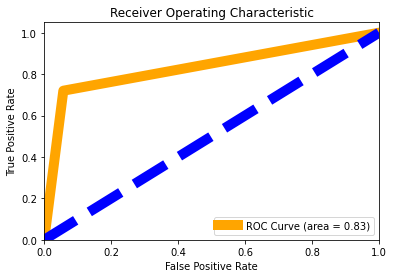

In [396]:
plt.figure()
plt.plot(fpr, tpr, color='orange',lw=10, label = "ROC Curve (area = %0.2f)" %roc_auc)
plt.plot([0,1],[0,1], color='Blue', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

We get roc area of 83% for Random Forest Classifier

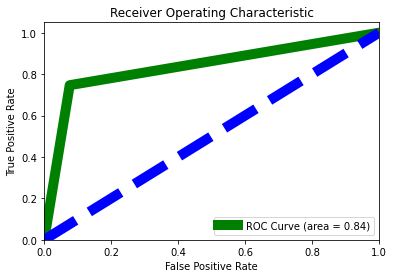

In [401]:
plt.figure()
plt.plot(fpr1, tpr1, color='green',lw=10, label = "ROC Curve (area = %0.2f)" %roc_auc)
plt.plot([0,1],[0,1], color='Blue', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

So we can see that KNN has covering more area than the Random Forest Regressor so we will be deploying this model as the best one

In [402]:
joblib.dump(GSCVknn.best_estimator_, 'TitanicSurvival.pkl')

['TitanicSurvival.pkl']

###  We are getting 85% Accuracy and 84% area covered for KNeighbors Classifier